# AlphaFactor Research 01

# Introduction

In [1]:
import pandas as pd
import ta
import numpy as np
import pickle
import itertools
from datetime import datetime

import alphalens
from alphalens import performance as perf
from alphalens import utils, plotting

import pyfolio

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [2]:
Prices = pickle.load(open('Prices.pkl', 'rb'))

In [3]:
train_start = datetime(2015, 1, 1)
train_end = datetime(2017, 12, 31)

trainPrices = {}
for symbol, data in Prices.items():
    trainPrices[symbol] = data.loc[train_start:train_end]

In [4]:
whl = trainPrices['WHL.JO'].copy()
whl.head()

,high,low,open,close,volume,adj_close
Date,,,,,,
2015-01-01,7710.0,7710.0,7710.0,7710.0,0.0,6203.339844
2015-01-02,7795.0,7600.0,7651.0,7625.0,613354.0,6134.950684
2015-01-05,7650.0,7301.0,7583.0,7340.0,1472081.0,5905.644043
2015-01-06,7641.0,7354.0,7354.0,7621.0,1173591.0,6131.731934
2015-01-07,7750.0,7451.0,7515.0,7750.0,2275334.0,6235.523438


# Data cleaning and validation

In [5]:
# 2017-01-18	
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 10):datetime(2017, 1, 20)]

,high,low,open,close,volume,adj_close
Date,,,,,,
2017-01-10,3489.0,3430.0,3475.0,3445.0,69398.0,3444.051270
2017-01-11,3465.0,3445.0,3455.0,3466.0,6426.0,3465.045410
2017-01-12,3440.0,3370.0,3440.0,3363.0,64075.0,3362.073730
2017-01-13,3400.0,3390.0,3390.0,3386.0,21058.0,3385.067383
2017-01-16,3419.0,3380.0,3395.0,3400.0,7148.0,3399.063477
2017-01-17,3385.0,3355.0,3380.0,3358.0,10926.0,3357.075195
2017-01-18,3415.0,3395.0,3395.0,3400.0,7366.0,3399.063477
2017-01-19,3405.0,3405.0,3405.0,340500.0,24398.0,340406.218750
2017-01-20,3370.0,3350.0,3370.0,3365.0,8243.0,3364.073242


In [6]:
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'close'] = 3405.00
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'adj_close'] = 3404.06218750

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [7]:
# 2017-07-12	
trainPrices['SCD.JO'].loc[datetime(2016, 1, 1):datetime(2017, 6, 30)]#['close'].plot()

,high,low,open,close,volume,adj_close
Date,,,,,,
2016-01-29,0.9800,0.9800,0.9800,0.9800,0.0,0.979231
2016-02-29,0.9800,0.9800,0.9800,0.9800,0.0,0.979231
2016-03-31,1.0426,1.0426,1.0426,1.0426,0.0,1.041782
2016-04-29,1.0426,1.0426,1.0426,1.0426,0.0,1.041782
2016-05-31,1.0426,1.0426,1.0426,1.0426,0.0,1.041782
2016-06-30,1.0770,1.0770,1.0770,1.0770,0.0,1.076155
2016-07-29,1.0770,1.0770,1.0770,1.0770,0.0,1.076155
2016-08-31,1.0770,1.0770,1.0770,1.0770,0.0,1.076155
2016-09-30,1.1239,1.1239,1.1239,1.1239,0.0,1.123018


In [8]:
scd = trainPrices['SCD.JO']
trainPrices['SCD.JO'] = scd.loc[datetime(2017, 6, 1):]
trainPrices['SCD.JO'].head()

,high,low,open,close,volume,adj_close
Date,,,,,,
2017-06-09,183400.0,182000.0,183400.0,182000.0,55547.0,181857.218750
2017-06-12,184500.0,181600.0,184500.0,184500.0,9676.0,184355.250000
2017-06-13,184500.0,182100.0,182900.0,183000.0,122820.0,182856.437500
2017-06-14,184500.0,184000.0,184000.0,184000.0,43226.0,183855.640625
2017-06-15,184500.0,184200.0,184500.0,184500.0,183360.0,184355.250000


# Classical techniques and cross-sectional strategies

## Basic trend following and/or Counter-trend strategy

In [9]:
macd = ta.trend.MACD(whl['close'], n_slow = 26, n_fast = 12, n_sign = 9)

ema26 = ta.trend.ema(whl['close'], periods = 26)
ema12 =ta.trend.ema(whl['close'], periods = 12)

whl['ema26'] = ema26
whl['ema12'] = ema12

whl['macd'] = macd.macd()
whl['macd_signal']  = macd.macd_signal()
whl['macd_diff'] = macd.macd_diff()


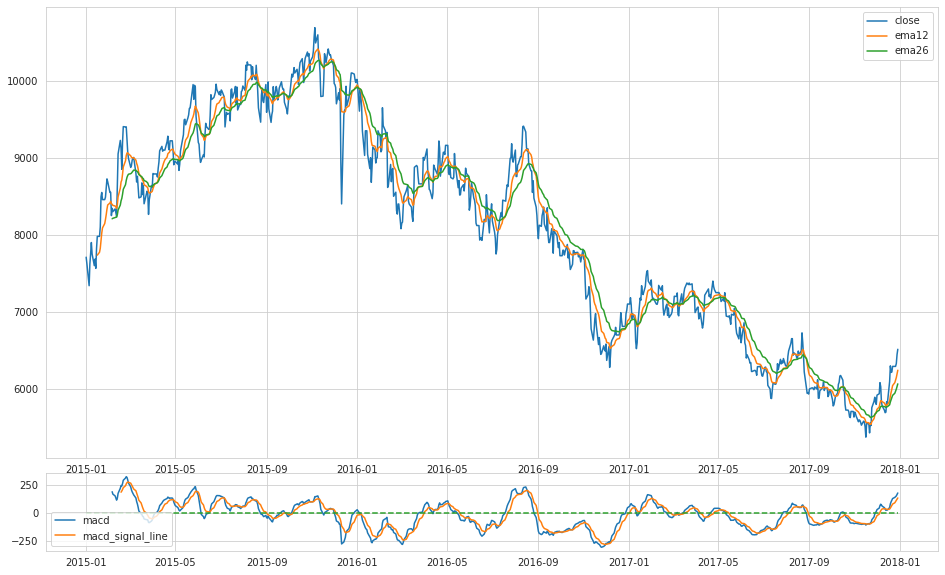

In [10]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(whl.index, whl['close'])
ax1.plot(whl.index, whl['ema12'])
ax1.plot(whl.index, whl['ema26'])
ax1.legend(('close', 'ema12', 'ema26', ))
ax1.set_xticklabels(' ')

ax2.plot(whl.index, whl['macd'])
ax2.plot(whl.index, whl['macd_signal'])
ax2.plot(whl.index, list(itertools.repeat(0, len(whl.index))), linestyle = 'dashed')
ax2.legend(('macd', 'macd_signal_line', ), loc = 'lower left')

In [11]:
%time
macd_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 0:
        data = data.copy()
        close = data['close']
        
        Macd = ta.trend.MACD(close, n_slow = 26, n_fast = 12, n_sign = 9)
        macd = Macd.macd()
        macd_signal = Macd.macd_signal()
        macd_diff = Macd.macd_diff() * -1

        out = pd.DataFrame(macd_diff)
        out['symbol'] = symbol
        out = out.reset_index().set_index(['Date', 'symbol'])

        macd_data = pd.concat([macd_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [12]:
macd_data

,,MACD_diff_12_26
Date,symbol,
2017-10-19,4SI.JO,NaN
2017-10-20,4SI.JO,NaN
2017-10-23,4SI.JO,NaN
2017-10-24,4SI.JO,NaN
2017-10-25,4SI.JO,NaN
...,...,...
2017-12-25,ZPLP.JO,-53.718039
2017-12-26,ZPLP.JO,-47.688752
2017-12-27,ZPLP.JO,-40.354182


In [13]:
prices_data = pd.DataFrame()
for symbol, data in trainPrices.items():
    out = data['close']
    out.name = symbol
    prices_data = pd.concat([prices_data, out], axis = 1)

In [14]:
prices_data.index = pd.to_datetime(prices_data.index)

In [15]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
factor_data

Dropped 5.5% entries from factor data: 5.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                              
2015-02-17 ABG.JO     0.020861  0.034446  0.022586  94.739168                3
           ABSP.JO   -0.008917 -0.031847 -0.025478  93.634103                3
           ACE.JO     0.000000 -0.153846  0.000000  -1.897642                1
           ACG.JO     0.002985 -0.004975  0.018905  21.486675                3
           ACL.JO     0.000000  0.005385  0.007692  -9.489539                1
...                        ...       ...       ...        ...              ...
2017-12-22 WSL.JO     0.000000  0.000000  0.012121   0.353278                3
           YRK.JO     0.000000  0.000000 -0.044444  -1.657683                2
           YYLBEE.JO  0.000000  0.000000  0.000728 -13.264181                1
           ZED.JO     0.000000  0.000000  0.028316  -5.564819                2
           ZPLP.JO    0.000000  0.000000 -0.002346 -57.537588                1

[236257 rows x 5 columns]

In [16]:
mean_quant_ret, std_quantile = \
    perf.mean_return_by_quantile(factor_data,
                                 by_group = False,
                                 demeaned = True,
                                 group_adjust = False)

mean_quant_rateret = \
        mean_quant_ret.apply(utils.rate_of_return, axis=0,base_period = mean_quant_ret.columns[0])

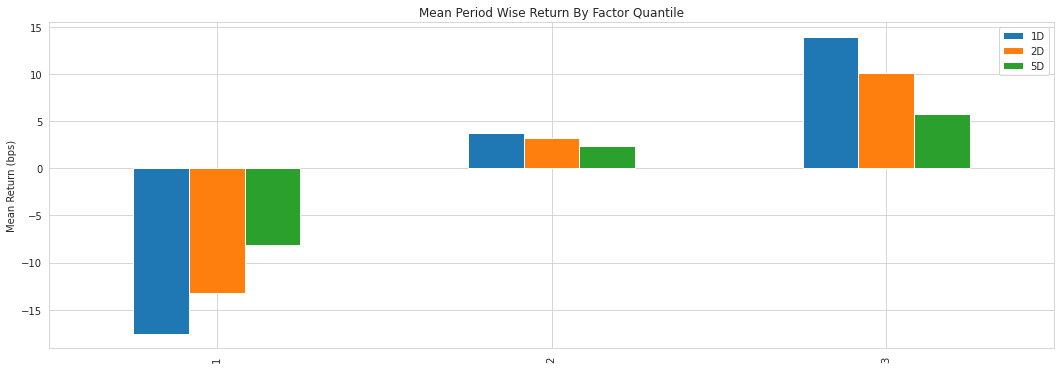

In [17]:
plotting.plot_quantile_returns_bar(mean_quant_rateret,
                                   by_group = False,
                                   ylim_percentiles = None)
plt.show()

In [18]:
factor_returns = perf.factor_returns(factor_data[factor_data['factor_quantile'].isin([1, 3])], demeaned = True)

mean_quant_ret_bydate, std_quant_daily = \
        perf.mean_return_by_quantile(factor_data,
                                     by_date = True,
                                     by_group = False,
                                     demeaned = True,
                                     group_adjust = False)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


<Figure size 1152x576 with 0 Axes>

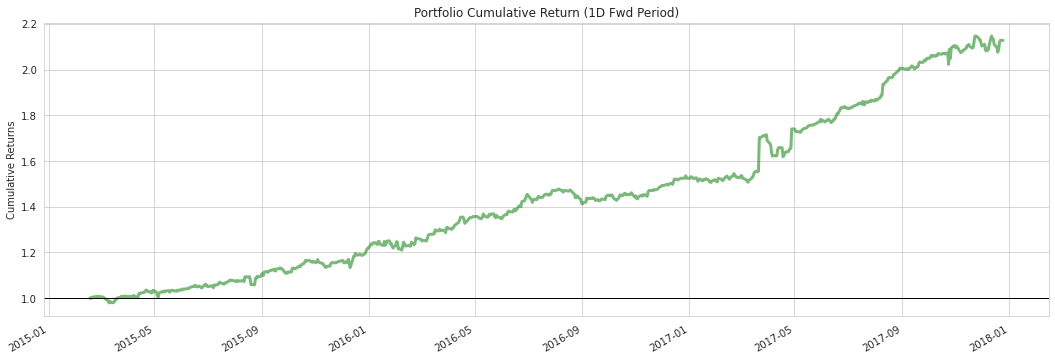

In [19]:
fig = plt.figure(figsize = (16, 8))
p = '1D'
title = 'Factor weighted LONG/SHORT portfolio cumulative returns'
plotting.plot_cumulative_returns(factor_returns[p],
                                         period = p)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

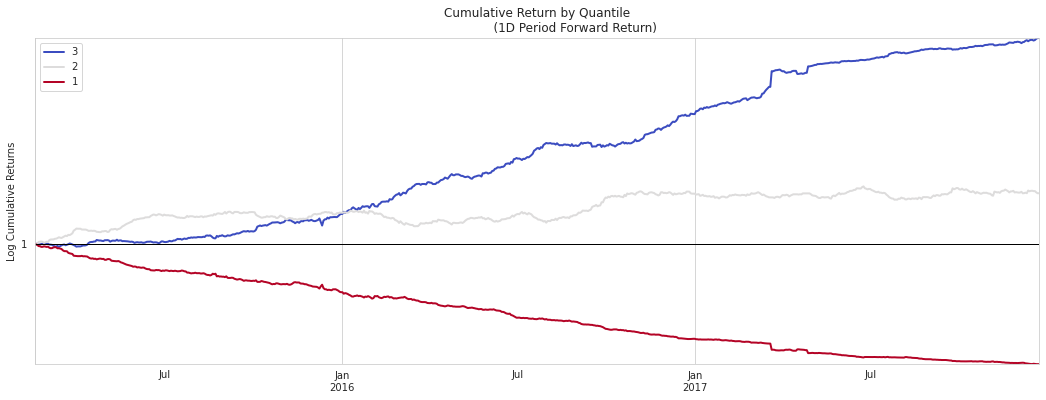

In [20]:
fig = plt.figure(figsize = (16, 8))
cumulative_quantile_returns = mean_quant_ret_bydate.groupby(level = ['factor_quantile', 'date']).sum()[p]
plotting.plot_cumulative_returns_by_quantile(cumulative_quantile_returns,
                                             period = p)
plt.show()

In [21]:
pyfolio_input = alphalens.performance.create_pyfolio_input(factor_data, period = '1D', capital = 1000000, quantiles = [1, 3])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


In [22]:
returns = pyfolio_input[0]
returns

date
2015-02-17    0.000000
2015-02-18   -0.002626
2015-02-19    0.006051
2015-02-20    0.000316
2015-02-21    0.000000
                ...   
2017-12-21    0.015364
2017-12-22    0.004756
2017-12-23    0.000000
2017-12-24    0.000000
2017-12-25   -0.000004
Freq: D, Length: 1043, dtype: float64

In [23]:
positions = pyfolio_input[1]
positions

asset,4SI.JO,ABG.JO,ABSP.JO,ACE.JO,ACG.JO,ACL.JO,ACS.JO,ACT.JO,ADH.JO,ADI.JO,...,VLE.JO,VOD.JO,WEA.JO,WHL.JO,WSL.JO,YRK.JO,YYLBEE.JO,ZED.JO,ZPLP.JO,cash
date,,,,,,,,,,,,,,,,,,,,,
2015-02-17,0.00000,14078.408130,13904.833059,-1100.551816,2572.475232,-2293.027952,-1231.502805,0.000000,-1253.199420,-1552.196346,...,0.0,-1744.071724,0.0,-10230.847939,0.000000,0.000000,0.000000,-5.529300,0.000000,1.000000e+06
2015-02-18,0.00000,7101.564682,16986.490400,-1790.455615,1293.293929,-2614.911468,-1904.318973,0.000000,-1889.687891,-2050.984698,...,0.0,-2477.946264,0.0,-7346.702868,-1714.084642,0.000000,0.000000,-930.691654,0.000000,9.973742e+05
2015-02-19,0.00000,1947.208780,33693.738847,0.000000,976.667364,-2717.516622,0.000000,0.000000,-2040.238325,-2283.796771,...,0.0,-2876.176350,0.0,-8430.639609,0.000000,0.000000,0.000000,-1200.046956,0.000000,1.003410e+06
2015-02-20,0.00000,596.738252,39663.546516,0.000000,846.435606,-2557.452959,0.000000,0.000000,0.000000,-2270.976464,...,0.0,-2484.957275,0.0,-10195.941087,-1920.340483,-1981.755676,0.000000,-1174.661397,0.000000,1.003727e+06
2015-02-21,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.003727e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,606.92931,-30816.441887,-21051.303122,0.000000,0.000000,1260.111636,-1003.956173,0.000000,-2713.184951,-414.756165,...,0.0,-13065.263817,0.0,-6344.476400,619.055380,0.000000,-1695.112144,0.000000,-8015.018821,2.117672e+06
2017-12-22,0.00000,-24442.244819,-24801.296295,0.000000,0.000000,2307.032843,-32.091683,1752.529319,-2130.390125,0.000000,...,0.0,-8732.711643,0.0,-6600.107960,1740.985822,0.000000,-548.077018,0.000000,-7990.332560,2.127744e+06
2017-12-23,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.127744e+06


In [24]:
benchmark = pyfolio_input[2]
benchmark

date
2015-02-17    0.000000
2015-02-18   -0.003950
2015-02-19   -0.000143
2015-02-20    0.010883
2015-02-21    0.000000
                ...   
2017-12-21    0.002517
2017-12-22    0.003760
2017-12-23    0.000000
2017-12-24    0.000000
2017-12-25   -0.000002
Freq: D, Name: benchmark, Length: 1043, dtype: float64

Start date,2015-02-17
End date,2017-12-25
Total months,49
,Backtest
Annual return,20.0%
Cumulative returns,112.8%
Annual volatility,9.5%
Sharpe ratio,1.97
Calmar ratio,3.56
Stability,0.98
Max drawdown,-5.6%


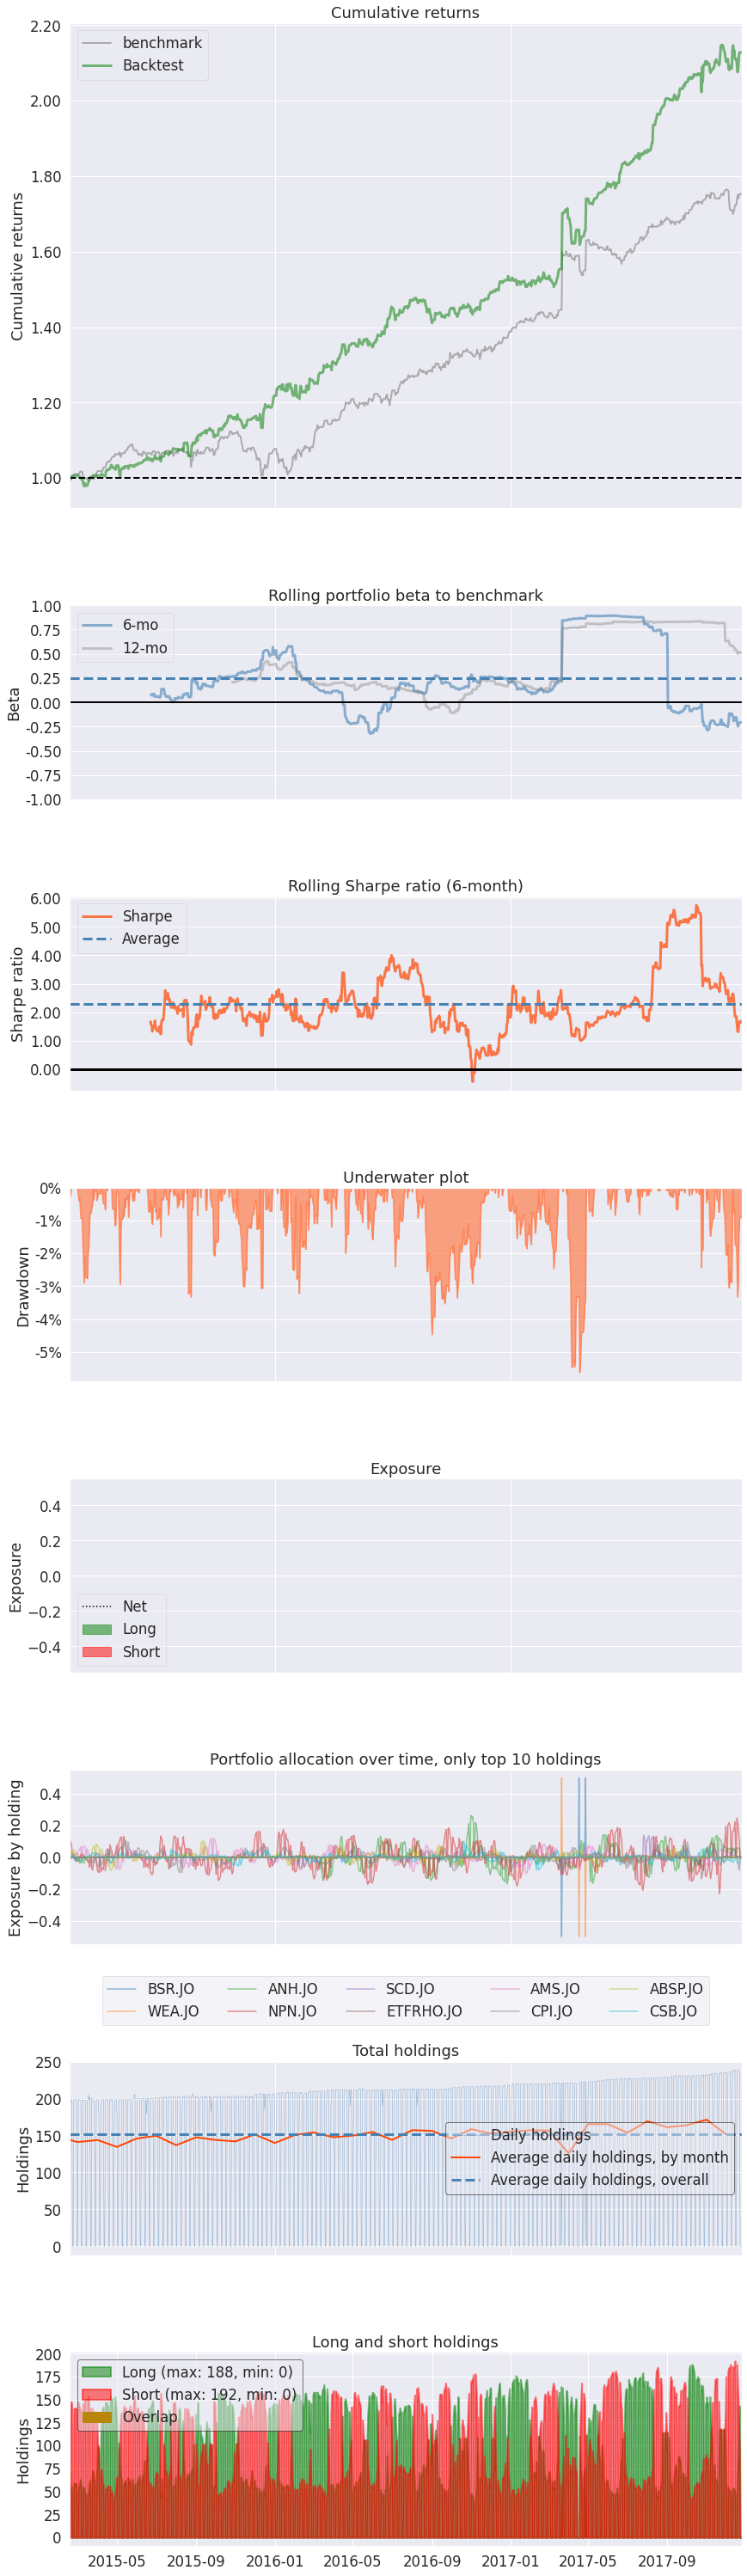

In [25]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark)

# A Quantamental Approach

In [26]:
import mlfinlab as ml
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

from sklearn.utils import resample
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, classification_report

## Universe Selection

In [27]:
QTradeableStocks_median_dollar_volume = 2500000
exchange_rate = 16.56
minimum_dollar_volume = QTradeableStocks_median_dollar_volume * exchange_rate
minimum_dollar_volume

41400000.0

In [28]:
%time
dollar_volume_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 200:
        data = data.copy()
        close = data['close']
        volume = data['volume']
        
        dollar_volume = volume.mul(close)
        trailing_dollar_volume = dollar_volume.rolling(window = 200).median()

        trailing_dollar_volume.name = 'trailing_dollar_volume'
        out = pd.DataFrame(trailing_dollar_volume)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index()#.set_index(['Date', 'symbol'])

        dollar_volume_data = pd.concat([dollar_volume_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


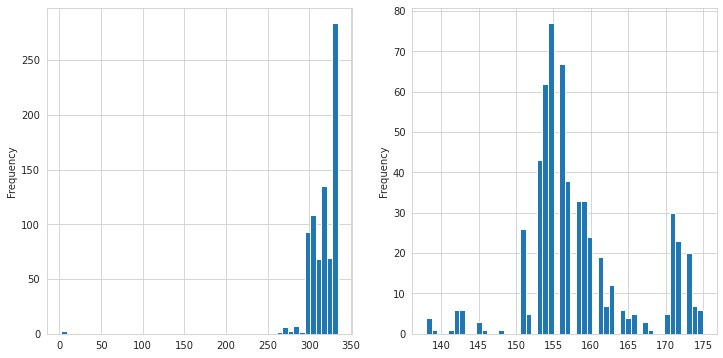

In [29]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

dollar_volume_data\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[0])

dollar_volume_data[dollar_volume_data['trailing_dollar_volume'] > minimum_dollar_volume]\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[1])

In [30]:
dollar_volume_data = dollar_volume_data.set_index(['Date', 'symbol'])
dollar_volume_data['group'] = np.where(dollar_volume_data['trailing_dollar_volume'] > minimum_dollar_volume, 'Tradeable', 'Non-tradeable')
dollar_volume_data

,,trailing_dollar_volume,group
Date,symbol,,
2015-01-01,ABG.JO,NaN,Non-tradeable
2015-01-02,ABG.JO,NaN,Non-tradeable
2015-01-05,ABG.JO,NaN,Non-tradeable
2015-01-06,ABG.JO,NaN,Non-tradeable
2015-01-07,ABG.JO,NaN,Non-tradeable
...,...,...,...
2017-12-25,ZPLP.JO,16254855.0,Non-tradeable
2017-12-26,ZPLP.JO,16254855.0,Non-tradeable
2017-12-27,ZPLP.JO,16254855.0,Non-tradeable


In [31]:
(dollar_volume_data['group'].value_counts() / len(dollar_volume_data)).round(3) * 100

Non-tradeable    62.9
Tradeable        37.1
Name: group, dtype: float64

In [32]:
QTradeableStocks_minimun_price = 5
minimum_price = QTradeableStocks_minimun_price * exchange_rate
minimum_price

82.8

In [33]:
%time
price_filter_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 50:
        data = data.copy()
        close = data['close']
        
        prices = close

        prices.name = 'prices'
        out = pd.DataFrame(prices)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        price_filter_data = pd.concat([price_filter_data, out])
        # print(i, symbol)

price_filter_data

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


,,prices
Date,symbol,
2017-10-19,4SI.JO,235.0
2017-10-20,4SI.JO,250.0
2017-10-23,4SI.JO,269.0
2017-10-24,4SI.JO,285.0
2017-10-25,4SI.JO,285.0
...,...,...
2017-12-25,ZPLP.JO,6395.0
2017-12-26,ZPLP.JO,6395.0
2017-12-27,ZPLP.JO,6393.0


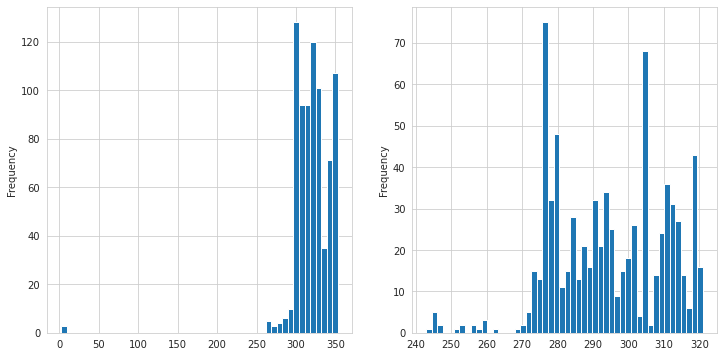

In [34]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

price_filter_data.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[0])

data = price_filter_data[price_filter_data['prices'] > minimum_price]
data.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[1])

In [35]:
price_filter_data['group'] = np.where(price_filter_data['prices'] > minimum_price, 'Tradeable', 'Non-tradeable')
price_filter_data

,,prices,group
Date,symbol,,
2017-10-19,4SI.JO,235.0,Tradeable
2017-10-20,4SI.JO,250.0,Tradeable
2017-10-23,4SI.JO,269.0,Tradeable
2017-10-24,4SI.JO,285.0,Tradeable
2017-10-25,4SI.JO,285.0,Tradeable
...,...,...,...
2017-12-25,ZPLP.JO,6395.0,Tradeable
2017-12-26,ZPLP.JO,6395.0,Tradeable
2017-12-27,ZPLP.JO,6393.0,Tradeable


In [36]:
(price_filter_data['group'].value_counts() / len(price_filter_data)).round(3) * 100

Tradeable        91.7
Non-tradeable     8.3
Name: group, dtype: float64

In [37]:
dollar_volume_data = dollar_volume_data.rename(columns = {'group':'filter1'})
price_filter_data = price_filter_data.rename(columns = {'group':'filter2'})
tradeable_universe = pd.concat([dollar_volume_data, price_filter_data], axis = 1)

tradeable_universe

trailing_dollar_volume        filter1   prices  \
Date       symbol                                                      
2015-01-01 ABG.JO                        NaN  Non-tradeable  18200.0   
           ABSP.JO                       NaN  Non-tradeable  79001.0   
           ACE.JO                        NaN  Non-tradeable     52.0   
           ACG.JO                        NaN  Non-tradeable    720.0   
           ACL.JO                        NaN  Non-tradeable   2641.0   
...                                      ...            ...      ...   
2017-12-29 WSL.JO                 25466691.0  Non-tradeable    167.0   
           YRK.JO                  9128730.5  Non-tradeable    258.0   
           YYLBEE.JO               8985922.5  Non-tradeable   6875.0   
           ZED.JO                496332189.5      Tradeable    690.0   
           ZPLP.JO                16094445.0  Non-tradeable   6380.0   

                            filter2  
Date       symbol                    
2015-01-01 ABG.JO         Tradeable  
           ABSP.JO        Tradeable  
           ACE.JO     Non-tradeable  
           ACG.JO         Tradeable  
           ACL.JO         Tradeable  
...                             ...  
2017-12-29 WSL.JO         Tradeable  
           YRK.JO         Tradeable  
           YYLBEE.JO      Tradeable  
           ZED.JO         Tradeable  
           ZPLP.JO        Tradeable  

[249643 rows x 4 columns]

In [38]:
tradeable_universe['filter'] = np.where(tradeable_universe['filter1'] == tradeable_universe['filter2'], tradeable_universe['filter1'], 'Non-tradeable')
tradeable_universe

trailing_dollar_volume        filter1   prices  \
Date       symbol                                                      
2015-01-01 ABG.JO                        NaN  Non-tradeable  18200.0   
           ABSP.JO                       NaN  Non-tradeable  79001.0   
           ACE.JO                        NaN  Non-tradeable     52.0   
           ACG.JO                        NaN  Non-tradeable    720.0   
           ACL.JO                        NaN  Non-tradeable   2641.0   
...                                      ...            ...      ...   
2017-12-29 WSL.JO                 25466691.0  Non-tradeable    167.0   
           YRK.JO                  9128730.5  Non-tradeable    258.0   
           YYLBEE.JO               8985922.5  Non-tradeable   6875.0   
           ZED.JO                496332189.5      Tradeable    690.0   
           ZPLP.JO                16094445.0  Non-tradeable   6380.0   

                            filter2         filter  
Date       symbol                                   
2015-01-01 ABG.JO         Tradeable  Non-tradeable  
           ABSP.JO        Tradeable  Non-tradeable  
           ACE.JO     Non-tradeable  Non-tradeable  
           ACG.JO         Tradeable  Non-tradeable  
           ACL.JO         Tradeable  Non-tradeable  
...                             ...            ...  
2017-12-29 WSL.JO         Tradeable  Non-tradeable  
           YRK.JO         Tradeable  Non-tradeable  
           YYLBEE.JO      Tradeable  Non-tradeable  
           ZED.JO         Tradeable      Tradeable  
           ZPLP.JO        Tradeable  Non-tradeable  

[249643 rows x 5 columns]

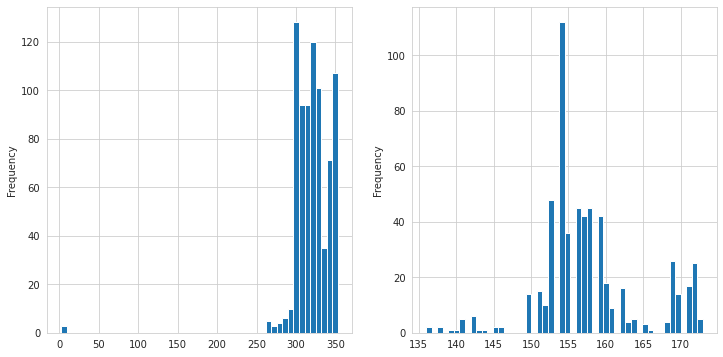

In [39]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

tradeable_universe.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[0])

data = tradeable_universe[tradeable_universe['filter'] == 'Tradeable']
data.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[1])

In [40]:
def macdDiff(open = None, high = None, low = None, close = None, volume = None,
            n_slow = 26, n_fast = 12, n_sign = 9):
    Macd = ta.trend.MACD(
        close, n_slow = n_slow, n_fast = n_fast, n_sign = n_sign)
    
    macd = Macd.macd()
    macd_signal = Macd.macd_signal()
    macd_diff = Macd.macd_diff() * -1
    return macd_diff

In [41]:
def getIndicator(trainPrices,
                 indicator,
                 filter = 'QTradeable',
                 trailing_volume_n = 200, 
                 *args, **kwargs):


    factor_df = pd.DataFrame()
    for i, (symbol, data) in enumerate(trainPrices.items()):
        if len(data) > trailing_volume_n:
            data = data.copy()

            open = data['open']
            high = data['high']
            low = data['low']
            close = data['close']
            volume = data['volume']
#             adj_close = data['adj_close']


            factor = indicator(
                open = open,
                high = high,
                low = low,
                close = close,
                volume = volume,
                *args, **kwargs
            )
            factor_name = factor.name

            out = pd.DataFrame(factor)
            out['symbol'] = symbol
            out.index.name = 'date'
            out = out.reset_index()\
                  .set_index(['date', 'symbol'])

            if filter == 'QTradeable':

                def getTrailingVolume(
                    close, volume, symbol, n = trailing_volume_n):

                    volume = data['volume']
                    dollar_volume = volume.mul(close)

                    trailing_dollar_volume = \
                        dollar_volume.rolling(
                            window = n).median()
                    trailing_dollar_volume.name = \
                        'trailing_dollar_volume'

                    trailing_dollar_volume = \
                        pd.DataFrame(trailing_dollar_volume)

                    trailing_dollar_volume['symbol'] = symbol

                    trailing_dollar_volume = \
                        trailing_dollar_volume.\
                        reset_index()\
                        .set_index(['date', 'symbol'])

                    return trailing_dollar_volume

                def getPricing(close, symbol):
                    prices = pd.DataFrame(close)
                    prices['symbol'] = symbol
                    prices = prices.reset_index()\
                        .set_index(['date', 'symbol'])

                    return prices

                # volume filter
                trailing_dollar_volume = \
                    getTrailingVolume(close, volume, symbol)

                # price filter
                prices = getPricing(close, symbol)

                out = pd.concat(
                    [out, trailing_dollar_volume, prices], 
                    axis = 1)

                QTradeableStocks_median_dollar_volume = 2500000
                exchange_rate = 16.56
                minimum_dollar_volume = \
                    QTradeableStocks_median_dollar_volume * exchange_rate

                QTradeableStocks_minimun_price = 5
                minimum_price = \
                    QTradeableStocks_minimun_price * exchange_rate

                volume_mask = out['trailing_dollar_volume'] > \
                    minimum_dollar_volume
                price_mask = out['close'] > minimum_price

                out = out[volume_mask & price_mask][[factor_name]]

            factor_df = pd.concat([factor_df, out])#.unstack().asfreq('C').stack()
    return factor_df

In [42]:
macd_data = getIndicator(trainPrices, macdDiff)
macd_data

,,MACD_diff_12_26
date,symbol,
2015-10-07,ABG.JO,-115.056498
2015-10-08,ABG.JO,-93.851347
2015-10-09,ABG.JO,-88.838636
2015-10-12,ABG.JO,-68.508261
2015-10-13,ABG.JO,-44.400638
...,...,...
2017-04-25,ZPLP.JO,11.463784
2017-04-26,ZPLP.JO,13.343110
2017-04-28,ZPLP.JO,11.059557


In [43]:
def getPrices(trainPrices, symbols):
    prices_data = pd.DataFrame()
    for symbol, data in trainPrices.items():
        if symbol in symbols:
            out = data['close']
            out.name = symbol
            prices_data = pd.concat([prices_data, out], axis = 1)
    prices_data.index = pd.to_datetime(prices_data.index)
    return prices_data#.asfreq('C')

In [44]:
prices_data = getPrices(trainPrices, symbols = macd_data.index.levels[1])
prices_data

,ABG.JO,ABSP.JO,ACG.JO,ACL.JO,ACT.JO,ADH.JO,ADI.JO,ADR.JO,AEG.JO,AEL.JO,...,TON.JO,TRU.JO,TSG.JO,TTO.JO,TWR.JO,VKE.JO,VOD.JO,WHL.JO,ZED.JO,ZPLP.JO
2015-01-01,18200.0,79001.0,720.0,2641.0,520.0,849.054016,810.0,3211.0,751.598022,1650.0,...,17292.0,7728.0,2514.479980,270.0,900.0,1800.0,12843.0,7710.0,755.0,NaN
2015-01-02,17989.0,79050.0,720.0,2582.0,523.0,861.741028,813.0,3205.0,749.439026,1619.0,...,16865.0,7785.0,2516.209961,270.0,900.0,1788.0,12631.0,7625.0,790.0,NaN
2015-01-05,17375.0,79454.0,740.0,2450.0,519.0,857.836975,820.0,3305.0,772.763977,1619.0,...,16713.0,7725.0,2440.780029,269.0,900.0,1810.0,12163.0,7340.0,780.0,NaN
2015-01-06,17828.0,79051.0,765.0,2455.0,530.0,863.692993,820.0,3340.0,734.320007,1699.0,...,16880.0,7690.0,2443.379883,255.0,870.0,1800.0,12345.0,7621.0,755.0,NaN
2015-01-07,18200.0,78200.0,765.0,2381.0,524.0,849.054016,815.0,3352.0,749.439026,1645.0,...,16851.0,7720.0,2452.909912,265.0,920.0,1796.0,12750.0,7750.0,740.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,17200.0,68800.0,399.0,389.0,621.0,1675.000000,615.0,1830.0,85.958603,1168.0,...,11256.0,9101.0,2124.300049,830.0,675.0,2070.0,14080.0,6293.0,671.0,6395.0
2017-12-26,17200.0,68800.0,399.0,389.0,621.0,1675.000000,615.0,1830.0,85.958603,1168.0,...,11256.0,9101.0,2124.300049,830.0,675.0,2070.0,14080.0,6293.0,671.0,6395.0
2017-12-27,17685.0,68800.0,380.0,400.0,650.0,1635.000000,610.0,1771.0,86.390602,1200.0,...,11400.0,9178.0,2090.479980,840.0,690.0,2076.0,14226.0,6329.0,679.0,6393.0
2017-12-28,17800.0,68800.0,384.0,400.0,640.0,1639.000000,641.0,1759.0,85.958603,1187.0,...,11350.0,9266.0,2123.429932,840.0,700.0,2065.0,14250.0,6447.0,667.0,6385.0


In [45]:
filtered_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data, 
    prices = prices_data, 
    quantiles = 3
)
filtered_factor_data

Dropped 1.9% entries from factor data: 1.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        5D       10D      factor  factor_quantile
date       asset                                                             
2015-10-07 ABG.JO  -0.022346 -0.031788 -0.024581 -115.056498                1
           ABSP.JO -0.004189 -0.001311  0.011487 -234.860978                1
           ACG.JO  -0.010453 -0.003484  0.017422  -14.319572                2
           ACL.JO   0.085427  0.105528 -0.045226  -24.833719                1
           ACT.JO   0.020408  0.000000 -0.030612    1.062614                3
...                      ...       ...       ...         ...              ...
2017-12-15 TWR.JO   0.000000  0.000000  0.037037    0.540878                2
           VKE.JO   0.030075  0.037594  0.044612    3.048777                2
           VOD.JO   0.044239 -0.006562  0.027235  -16.592089                1
           WHL.JO   0.048323  0.082201  0.120378    5.387332                2
           ZED.JO   0.046774  0.082258  0.112903    4.577393                2

[89560 rows x 5 columns]

In [46]:
def plotFactorQuantileBars(
    factor_data, demeaned = True, by_group = False, group_adjust = False):
    
    mean_quant_ret, std_quantile = \
        perf.mean_return_by_quantile(
        factor_data,
        demeaned = demeaned,
        by_group = by_group,
        group_adjust = group_adjust)

    mean_quant_rateret = \
            mean_quant_ret\
                .apply(
        utils.rate_of_return, 
        axis = 0,
        base_period = mean_quant_ret.columns[0])
    
    plotting.plot_quantile_returns_bar(mean_quant_rateret,
                                   by_group = by_group,
                                   ylim_percentiles = None)
    plt.show()

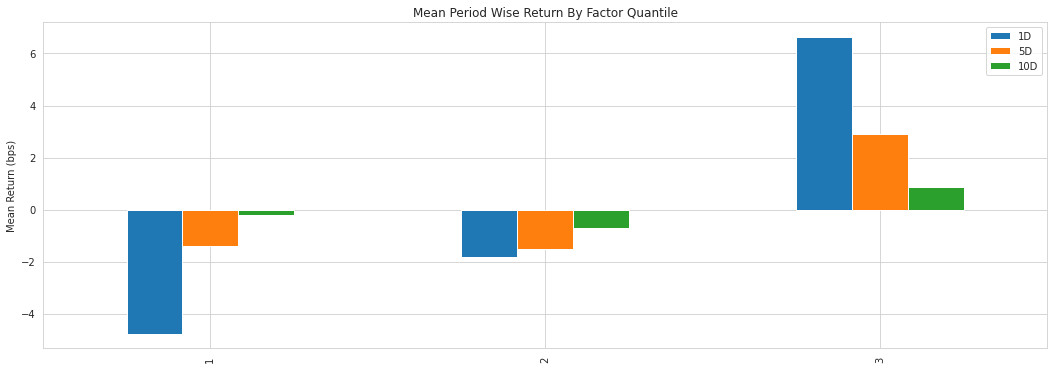

In [47]:
plotFactorQuantileBars(filtered_factor_data)

In [48]:
def plotCumulativeReturns(factor_data, p = '1D', demeaned = True, group_adjust = False):
    factor_returns = perf.factor_returns(
        factor_data, 
        demeaned = demeaned, 
        group_adjust = group_adjust)

    fig = plt.figure(figsize = (16, 8))
    p = '1D'
    title = \
        'Factor weighted LONG/SHORT portfolio cumulative returns'
    plotting.plot_cumulative_returns(
        factor_returns[p],
        period = p)
    plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


<Figure size 1152x576 with 0 Axes>

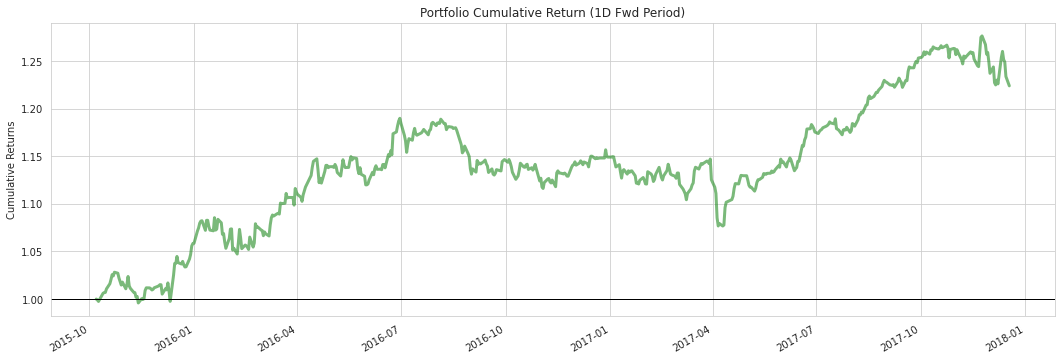

In [49]:
plotCumulativeReturns(filtered_factor_data)

In [50]:
def plotQuantileCumelativeReturns(factor_data, 
                                  p = '1D',
                                  demeaned = True,
                                  by_date = True,
                                  by_group = False,
                                  group_adjust = False):
    
    mean_quant_ret_bydate, std_quant_daily = \
            perf.mean_return_by_quantile(
                             factor_data,
                             demeaned = demeaned,
                             by_date = by_date,
                             by_group = by_group,
                             group_adjust = group_adjust)

    fig = plt.figure(figsize = (16, 8))
    cumulative_quantile_returns = \
        mean_quant_ret_bydate\
        .groupby(level = ['factor_quantile', 'date'])\
        .sum()[p]
    
    plotting.plot_cumulative_returns_by_quantile(
        cumulative_quantile_returns,
        period = p)
    plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

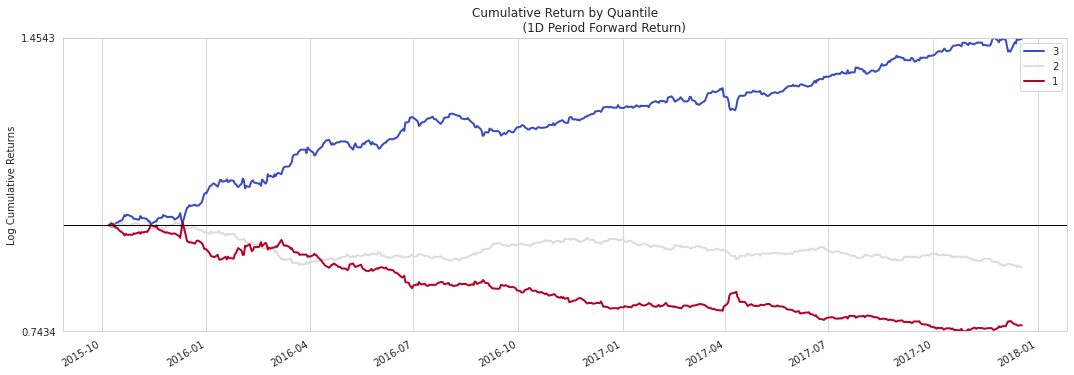

In [51]:
plotQuantileCumelativeReturns(filtered_factor_data)

In [52]:
pyfolio_input = alphalens.performance.create_pyfolio_input(filtered_factor_data, period = '1D', capital = 1000000, quantiles = [1, 3])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


In [53]:
returns = pyfolio_input[0]
positions = pyfolio_input[1]
benchmark = pyfolio_input[2]

Start date,2015-10-07
End date,2017-12-18
Total months,38
,Backtest
Annual return,8.1%
Cumulative returns,28.3%
Annual volatility,7.7%
Sharpe ratio,1.05
Calmar ratio,0.80
Stability,0.70
Max drawdown,-10.1%


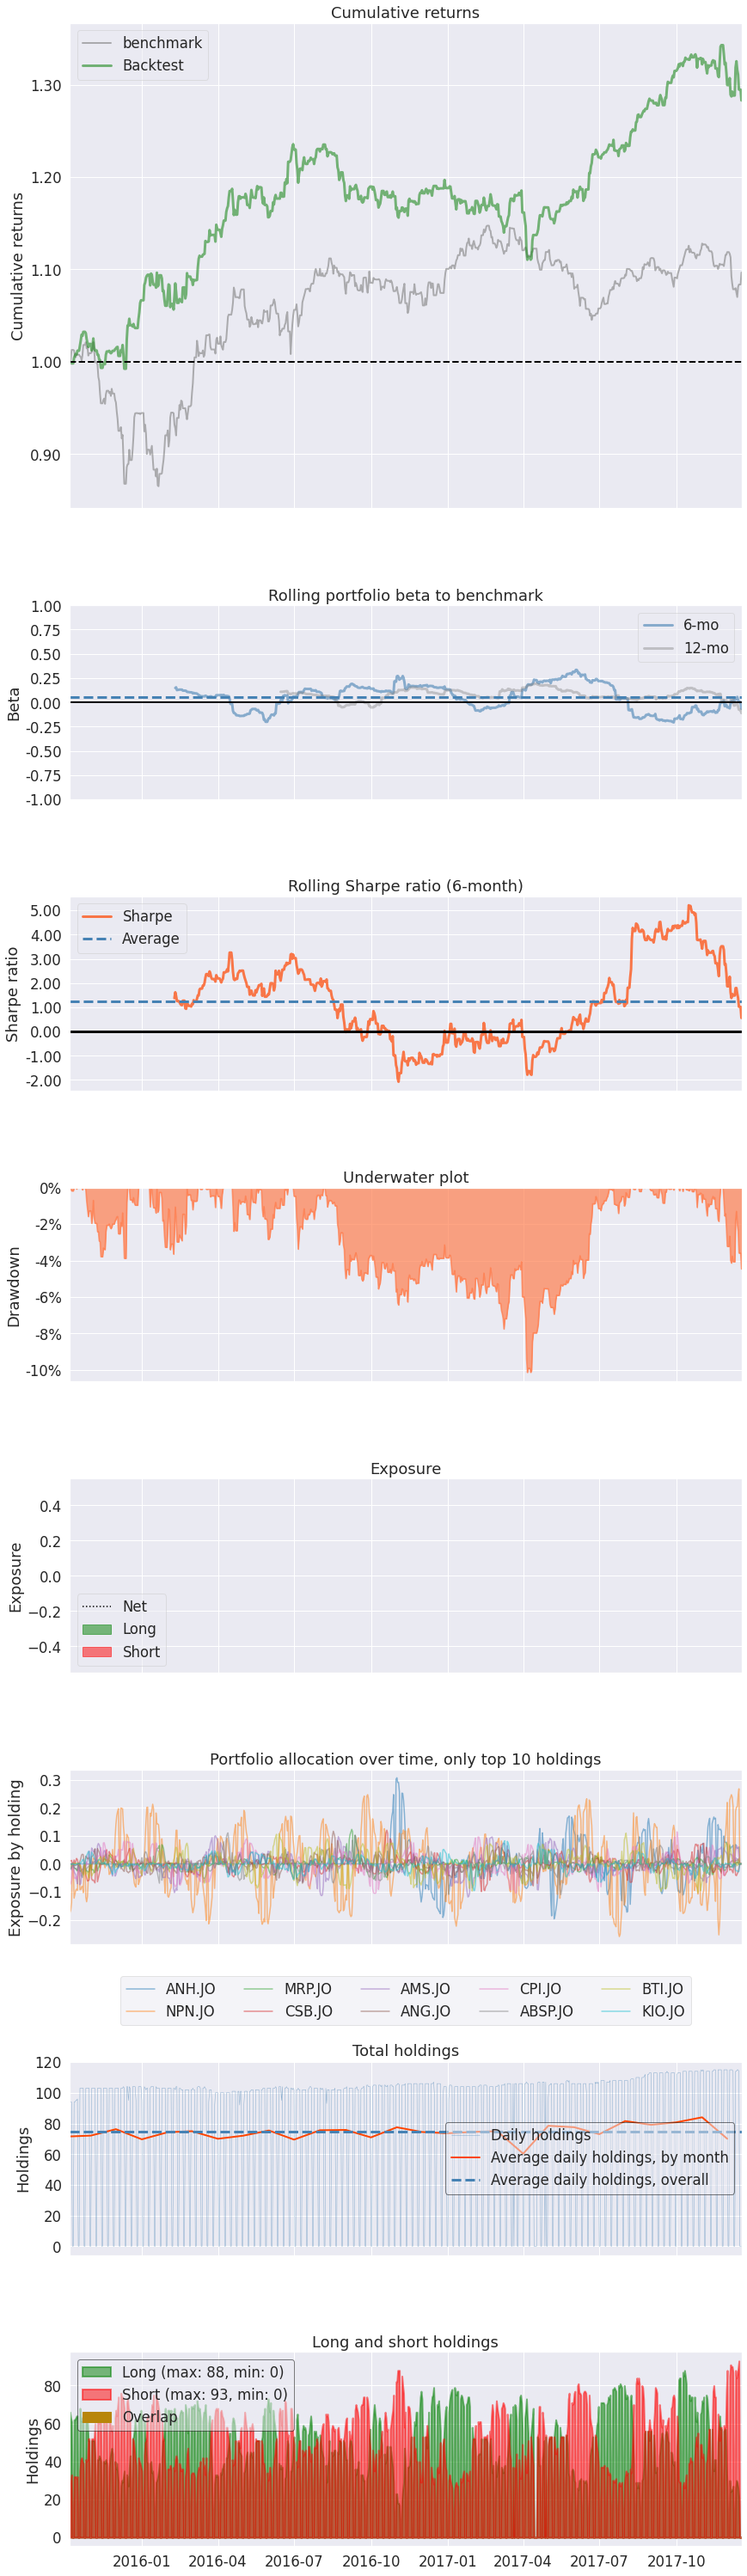

In [54]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark, )

## Feature Engineering

### Labeling (Tripple Barrier Method)

In [355]:
def getLabels(datas,
              lookback = 5,
              num_days_ahead = 1,
              pt_sl = [1, 1],
              min_ret = 0.005):
    
    output = {}
    for symbol, data in datas.items():
        
        try:
            close = data['close']

            if len(close) > lookback: 

                daily_vol = ml.util.get_daily_vol(
                                close, 
                                lookback = lookback)
        
                if daily_vol.nunique() != 1:

                    cusum_events = ml.filters.cusum_filter(
                                        close,
                                        threshold = daily_vol)

                    data = data.reset_index()
                    data['event'] = np.where(data['Date'].isin(cusum_events), 1, 0)
                    data.set_index('Date', inplace = True)

                    vertical_barriers = ml.labeling.add_vertical_barrier(
                                            t_events = cusum_events,
                                            close = close,
                                            num_days = num_days_ahead)

                    data['vertical_barriers'] = vertical_barriers

                    triple_barrier_events = ml.labeling.get_events(
                                    close = close,
                                    t_events = cusum_events,
                                    pt_sl = pt_sl,
                                    target = daily_vol,
                                    min_ret = min_ret,
                                    vertical_barrier_times = vertical_barriers,
                                    num_threads = 1,
                                    verbose = False)

                    data = pd.concat(
                        [data, triple_barrier_events], 
                        axis = 1).drop('trgt', axis = 1)

                    labels = ml.labeling.get_bins(
                        triple_barrier_events, close)

                    data = pd.concat([data, labels], axis = 1)
                    data.index.name = 'date'

                    data['profit_taking'] = data['pt'].mul(data['trgt'])
                    data['stop_loss'] = data['sl'].mul(data['trgt']).mul(-1)

                    data.reset_index(inplace = True)
                    data['holding_period'] = pd.to_datetime(data['t1'])\
                        .sub(pd.to_datetime(data['date']))\
                        .map(lambda x: x.days)
                    data.drop(['trgt', 'pt', 'sl'], axis = 1, inplace = True)
                    data.set_index('date', inplace = True)

                    data.rename(columns = 
                                {'vertical_barriers':'max_holding_period', 
                                 'ret':'expected_return', 
                                 'bin':'label'
                                }, inplace = True)     
                    output[symbol] = data#[data['event'] == 1]
        except Exception as e:
            print(f"{symbol}: {e}")
    return output

In [356]:
cusumTrainPrices = getLabels(trainPrices)

In [357]:
for symbol, data in cusumTrainPrices.items():
    
    data = data[data['event'] == 1]
    cusumTrainPrices[symbol] = data

In [358]:
target = pd.DataFrame()
for symbol, data in cusumTrainPrices.items():
    data = data.copy()
    data['expected_return'] = np.where(data['expected_return'].isna(), 0, data['expected_return'])
    data['holding_period'] = np.where(data['holding_period'] > 5, 5, data['holding_period'])
    data['holding_period'] = np.where(data['holding_period'].isna(), 0, data['holding_period'])
    data['label'] = np.where(data['label'].isna(), 0, data['label'])
    label = data['label']
    events = data['event']
    vv = data[['expected_return', 'holding_period']].copy()
    vv = pd.pivot(vv.reset_index(), index = 'date', columns = 'holding_period', values = 'expected_return')
    vv = pd.DataFrame(np.where(vv.isna(), 0, vv), index = vv.index, columns = vv.columns)
    out = pd.concat([vv, events, label], axis = 1)
    out['asset'] = symbol
    out = out.reset_index().set_index(['date', 'asset'])
    target = pd.concat([target, out])

In [359]:
target

,,0.0,1.0,3.0,event,label,5.0,2.0,4.0
date,asset,,,,,,,,
2017-10-24,4SI.JO,0.0,0.000000,0.000000,1,0.0,NaN,NaN,NaN
2017-10-27,4SI.JO,0.0,0.000000,0.054902,1,0.0,NaN,NaN,NaN
2017-11-03,4SI.JO,0.0,0.000000,-0.023904,1,0.0,NaN,NaN,NaN
2017-11-07,4SI.JO,0.0,-0.199134,0.000000,1,-1.0,NaN,NaN,NaN
2017-11-08,4SI.JO,0.0,0.081081,0.000000,1,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2017-12-07,ZPLP.JO,0.0,0.000000,0.000000,1,0.0,NaN,NaN,NaN
2017-12-14,ZPLP.JO,0.0,0.033165,0.000000,1,1.0,NaN,NaN,NaN
2017-12-15,ZPLP.JO,0.0,0.000000,0.050420,1,1.0,NaN,NaN,NaN


In [360]:
data = target[target['event'] == 1]
factor_data = data[[0, 1, 2, 3, 4, 5]].max(axis = 1)
factor_data = pd.DataFrame(factor_data, columns = ['1D'])
factor_data = pd.concat([factor_data, data['label']], axis = 1).rename(columns = {'label':'factor_quantile'})
factor_data

,,1D,factor_quantile
date,asset,,
2017-10-24,4SI.JO,0.000000,0.0
2017-10-27,4SI.JO,0.054902,0.0
2017-11-03,4SI.JO,0.000000,0.0
2017-11-07,4SI.JO,0.000000,-1.0
2017-11-08,4SI.JO,0.081081,0.0
...,...,...,...
2017-12-07,ZPLP.JO,0.000000,0.0
2017-12-14,ZPLP.JO,0.033165,1.0
2017-12-15,ZPLP.JO,0.050420,1.0


In [361]:
(factor_data['factor_quantile'].value_counts() / len(factor_data)).mul(100).round(2)

 0.0    72.76
 1.0    14.28
-1.0    12.96
Name: factor_quantile, dtype: float64

### Factor Library

In [155]:
# data = trainPrices['MTN.JO']
# open = data['open']
# high = data['high']
# low = data['low']
# close = data['close']
# volume = data['volume']

In [362]:
## Momentum indicators

# awesome oscillator
def ao(open = None, high = None, low = None, close = None, volume = None,
       s = 3, len = 9):
    ao = ta.momentum.AwesomeOscillatorIndicator(
        high, low, s = s, len = len).ao() 
    return ao

# kama indicator, normalised
def kamaCrossOver(open = None, high = None, low = None, close = None, volume = None,
                  n = 10, pow1 = 2, pow2 = 30):
    
    """
    Try pow1 = 2 to 5 for smoothing the indicator even further, may improve result
    """
    
    kamashort = ta.momentum.KAMAIndicator(close, n = n, pow1 = pow1, pow2 = pow2).kama()
    cross_over = close.sub(kamashort).div(close) * -1
    cross_over.name = 'kama_cross_over'
    return cross_over
    
# roc indicator
def rocIndicator(open = None, high = None, low = None, close = None, volume = None,
                n = 4):
    roc = ta.momentum.ROCIndicator(close, n = n).roc() * -1
    return roc

# reletive strength index
def rsi(open = open, high = None, low = None, close = None, volume = None,
       n = 5):
    rsi = ta.momentum.RSIIndicator(close, n = n).rsi() * -1
    rsi.name = 'rsi'
    return rsi

def tsi(open = None, high = None, low = None, close = None, volume = None,
       r = 9, s = 5):
    tsi = ta.momentum.TSIIndicator(close, r = r, s = s).tsi() * -1
    tsi.name = 'tsi'
    return tsi

# stochastic oscilator
def stochOscillator(open = open, high = None, low = None, close = None, volume = None,
                    n = 14, m = 3, slow = None):
    
    lowest_low = low.rolling(window = n).min()
    highest_high = high.rolling(window = n).max()
    
    percentK = (close - lowest_low)/(highest_high - lowest_low) * 100
    percentD = ta.trend.sma(percentK, periods = m)
    signal = percentD.sub(percentK)
    signal.name = 'fast_stoch_osc'
    
    if not slow:
        return signal
    elif slow:
        slow_percentK = ta.trend.sma(percentK, periods = m)
        slow_percentD = ta.trend.sma(slow_percentK, periods = m)
        slow_signal = slow_percentD.sub(slow_percentK)
        slow_signal.name = 'slow_stoch_osc'
        return slow_signal

def uo(open = None, high = None, low = None, close = None, volume = None,
       s = 7, m = 14, len = 28, ws = 4, wm = 2, wl = 1):
    uo = ta.momentum.UltimateOscillator(
        high, low, close, s = s, m = m, len = len, ws = ws, wm = wm, wl = wl).uo() * -1
    return uo

def williamsR(open = None, high = None, low = None, close = None, volume = None,
       lbp = 14):
    wr = ta.momentum.WilliamsRIndicator(
        high, low, close, lbp = lbp).wr() * -1
    return wr

In [363]:
## Volatility Indicators
#bbands, percentB
def percentB(open = None, high = None, low = None, close = None, volume = None,
             n = 20, ndev = 2):
    bbands = ta.volatility\
        .BollingerBands(close, n = n, ndev = ndev)
    upper = bbands.bollinger_hband()
    lower = bbands.bollinger_lband()

    perc_b = ((close - lower)/(upper - lower)) * -1
    perc_b.name = 'perc_b'
    perc_b
    return perc_b

In [364]:
## Trend Indicators
def macdDiff(open = None, high = None, low = None, close = None, volume = None,
            n_slow = 26, n_fast = 12, n_sign = 9):
    Macd = ta.trend.MACD(
        close, n_slow = n_slow, n_fast = n_fast, n_sign = n_sign)
    
    macd = Macd.macd()
    macd_signal = Macd.macd_signal()
    macd_diff = Macd.macd_diff() * -1
    return macd_diff

In [365]:
## Volume Indicator
def mfi(open = None, high = None, low = None, close = None, volume = None,
       n = 12):
    mfi = ta.volume.MFIIndicator(
            high, low, close, volume, n = n)\
            .money_flow_index()
    mfi.name = 'mfi'
    return mfi

### Moving Average Convergence Divergence and the impact of traded volume

In [366]:
trailing_volume_window = 20

In [367]:
macd_data = getIndicator(
    cusumTrainPrices,
    macdDiff, 
    trailing_volume_n = trailing_volume_window, 
    n_slow = 6, n_fast = 4, n_sign = 3)
macd_data = macd_data.unstack().asfreq('C').stack()
macd_data

MACD_diff_4_6
date       symbol               
2015-02-23 TON.JO      14.857341
2015-02-24 CML.JO      -6.965745
2015-02-26 SHP.JO      52.594273
2015-02-27 TON.JO      51.873464
2015-03-02 CCO.JO     -15.052717
...                          ...
2017-12-29 TDH.JO      -3.535839
           TKG.JO     -12.708836
           VKE.JO      -3.184137
           VOD.JO     -19.977281
           ZED.JO      -1.889218

[45055 rows x 1 columns]

In [368]:
prices_data = getPrices(cusumTrainPrices, macd_data.index.levels[1])
prices_data = prices_data.asfreq('C')

In [369]:
macd_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data,
    prices = prices_data,
    quantiles = 5,
    periods = [1, 2, 5]
)
macd_factor_data

Dropped 0.6% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                           
2015-03-02 CCO.JO  0.000000  0.000000 -0.027248 -15.052717              1.0
           CML.JO -0.013383  0.001368 -0.027547  15.572801              4.0
           FFB.JO  0.000000  0.077108  0.077108  12.165976              3.0
           TCP.JO  0.000000  0.000000 -0.021739  -3.454502              2.0
           TON.JO  0.000000  0.000000 -0.036856  66.201099              5.0
...                     ...       ...       ...        ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.000000 -29.043693              1.0
           SOL.JO  0.000000  0.000000  0.018144  12.617320              5.0
           TWR.JO  0.000000  0.000000  0.022222  -0.174725              5.0
           VOD.JO  0.000000  0.000000  0.034020  -3.092646              3.0
           WHL.JO  0.000000  0.000000  0.024472 -20.393460              2.0

[44804 rows x 5 columns]

In [370]:
def getVolumeOsc(open = None, high = None, low = None, close = None, volume = None,
                periods = 20):
    vol_sma = ta.trend.ema(volume, periods = periods)
    vol_sma.name = 'volume_oscillator20'
    return vol_sma

In [371]:
volume_osc_data = getIndicator(
    cusumTrainPrices, 
    getVolumeOsc, 
    trailing_volume_n = trailing_volume_window)
volume_osc_data = volume_osc_data.unstack().asfreq('C').stack()
volume_osc_data

volume_oscillator20
date       symbol                     
2015-02-23 TON.JO         2.107759e+05
2015-02-24 CML.JO         1.124217e+06
2015-02-26 SHP.JO         1.708150e+06
2015-02-27 TON.JO         1.948228e+05
2015-03-02 CCO.JO         9.686613e+05
...                                ...
2017-12-29 TDH.JO         1.000706e+05
           TKG.JO         2.039540e+06
           VKE.JO         9.565444e+05
           VOD.JO         3.281697e+06
           ZED.JO         2.932825e+06

[45055 rows x 1 columns]

In [372]:
def createGroupingFactor(factor_data, 
                         group_data, 
                         prices_data, 
                         num_groupes = 3):
    
    group_factor_data = alphalens\
    .utils.get_clean_factor_and_forward_returns(
        factor = group_data,
        prices = prices_data,
        quantiles = num_groupes,
        periods = [1]
    )
#     volume_factor_data

    qroup_quantiles = group_factor_data['factor_quantile']
    qroup_quantiles.name = 'group'
    factor_data_w_group = pd.concat(
        [factor_data, qroup_quantiles], 
        axis = 1).dropna()
    return factor_data_w_group

In [373]:
macd_factor_data = createGroupingFactor(
    macd_factor_data, 
    group_data = volume_osc_data, 
    prices_data = prices_data, 
    num_groupes = 3)
macd_factor_data

Dropped 0.2% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile  \
date       asset                                                              
2015-03-02 CCO.JO  0.000000  0.000000 -0.027248 -15.052717              1.0   
           CML.JO -0.013383  0.001368 -0.027547  15.572801              4.0   
           FFB.JO  0.000000  0.077108  0.077108  12.165976              3.0   
           TCP.JO  0.000000  0.000000 -0.021739  -3.454502              2.0   
           TON.JO  0.000000  0.000000 -0.036856  66.201099              5.0   
...                     ...       ...       ...        ...              ...   
2017-12-22 SNT.JO  0.000000  0.000000  0.000000 -29.043693              1.0   
           SOL.JO  0.000000  0.000000  0.018144  12.617320              5.0   
           TWR.JO  0.000000  0.000000  0.022222  -0.174725              5.0   
           VOD.JO  0.000000  0.000000  0.034020  -3.092646              3.0   
           WHL.JO  0.000000  0.000000  0.024472 -20.393460              2.0   

                   group  
date       asset          
2015-03-02 CCO.JO    3.0  
           CML.JO    3.0  
           FFB.JO    1.0  
           TCP.JO    2.0  
           TON.JO    1.0  
...                  ...  
2017-12-22 SNT.JO    1.0  
           SOL.JO    3.0  
           TWR.JO    1.0  
           VOD.JO    3.0  
           WHL.JO    3.0  

[44804 rows x 6 columns]

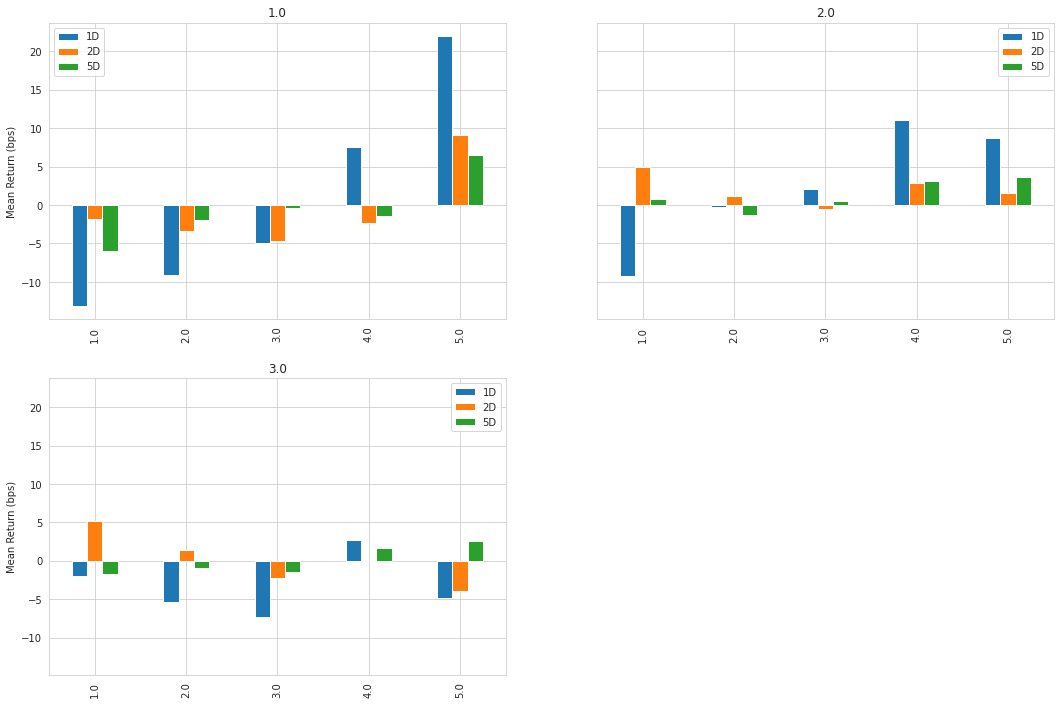

In [374]:
plotFactorQuantileBars(macd_factor_data, by_group = True, group_adjust = False)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

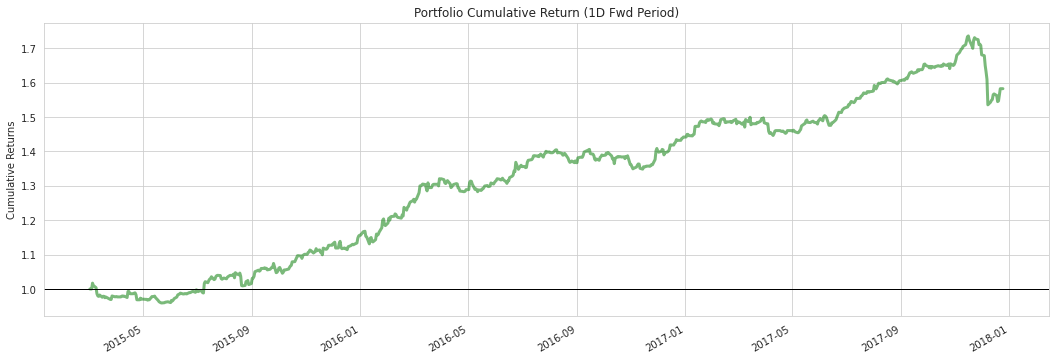

In [375]:
plotCumulativeReturns(macd_factor_data)

#### Perfomance evaluation

In [376]:
# train['label'] = train['label'].astype('int')
# train['group'] = train['group'].astype('int')
# X = train[['factor', 'group']]
# y = train['label'].astype('int')

In [377]:
# def upsamplingCV(clf, X, y, cv):

#     predictions = pd.DataFrame()
#     probabilities = pd.DataFrame()
#     kf = KFold(n_splits = cv)
#     for train_index, test_index in kf.split(X, y):

#         train_X = X.iloc[train_index, ]
#         train_y = y.iloc[train_index]

#         test_X = X.iloc[test_index, ]
#         test_y = y.iloc[test_index]

#         target_counts = train_y.value_counts()
#         positive_counts = target_counts[1]
#         neutral_counts = target_counts[0]
#         negative_counts = target_counts[-1]

#         out = pd.DataFrame()
#         for label_counts in ['positive_counts', 'negative_counts']:

#             if label_counts == 'positive_counts':
#                 minority_mask = train_y == 1
#                 majority_mask = train_y == 0

#             if label_counts == 'negative_counts':
#                 minority_mask = train_y == -1
#                 majority_mask = train_y == 0


#             minority_df = train_X[minority_mask].copy()
#             minority_df['label'] = train_y[minority_mask]

#             majority_df = train_X[majority_mask].copy()
#             majority_df['label'] = train_y[majority_mask]

#             upsampled_minority_df = resample(
#                 minority_df, 
#                 replace = True, 
#                 n_samples = len(majority_df), 
#                 random_state = 42)

#             out = pd.concat(
#                 [out, upsampled_minority_df])

#         upsampled_df = pd.concat(
#             [majority_df, out])

#         upsampled_train_X = upsampled_df.drop(
#             'label', axis = 1)
#         upsampled_y = upsampled_df['label']


#         n_classes = 3
#         upsampled_y = pd.DataFrame(label_binarize(
#             upsampled_y, 
#             classes = [-1, 0, 1]),
#             index = upsampled_y.index,
#             columns = [-1, 0, 1])

#         model = OneVsRestClassifier(clf)
#         model.fit(
#             upsampled_train_X, 
#             upsampled_y)

#         probs = model.predict_proba(test_X)
#         probs = pd.DataFrame(
#             probs, 
#             index = test_y.index, 
#             columns = upsampled_y.columns)


#         probabilities = pd.concat(
#             [probabilities, probs])

#     return probabilities

In [378]:
# probabilities = upsamplingCV(
#     clf = LogisticRegression(
#         random_state = 42), 
#     X = X, 
#     y = y, 
#     cv = 10)

In [379]:
# def convertToMultiClass(y):
#     classes = [-1, 0, 1]
#     transformed_y = pd.DataFrame(label_binarize(
#         y, 
#         classes = classes),
#         index = y.index,
#         columns = [-1, 0, 1])
#     return transformed_y

In [380]:
# true_y = convertToMultiClass(y)

In [381]:
# def plotROC(true_y, probabilities):
#     # Compute ROC curve and ROC area for each class
#     fpr = dict()
#     tpr = dict()
#     classes = [-1, 0.0, 1]
#     roc_auc = dict()
#     for i, label in enumerate(classes):
#         fpr[i], tpr[i], _ = roc_curve(true_y.iloc[:, i], probabilities.iloc[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     fig, axes = plt.subplots(1, 3, figsize = (18, 6))
#     for i, label in enumerate(classes):

#     #     print(i)
#         data = pd.DataFrame({'FPR':fpr[i], 'TPR':tpr[i], 'roc':roc_auc[i]})
#         line_data = pd.DataFrame({'x':[0, 1], 'y':[0, 1]})

#         g = sns.lineplot(data = line_data, x = 'x', y = 'y',ax = axes[i], legend = None, color = 'black')
#         g = data.plot(x = 'FPR', y = 'TPR', ax = axes[i], kind = 'line', legend = None)

#         g.lines[0].set_linestyle("--")
#         g.set_ylabel('TPR')
#         if label == 1:
#             g.set_title(f"Long \n \n AUC = {round(roc_auc[i], 2)}")
#         elif label == -1:
#             g.set_title(f"Short \n \n AUC = {round(roc_auc[i], 2)}")
#         elif label == 0:
#             g.set_title(f"Neutral \n \n AUC = {round(roc_auc[i], 2)}")
#     plt.show()

In [382]:
# plotROC(true_y, probabilities)

### Bollinger Bands

In [383]:
data = cusumTrainPrices['WHL.JO'].copy()
close = data['close']
n = 12
data['movav'] = ta.trend.sma(close, periods = n)
data['upper'] = ta.volatility.bollinger_hband(close, n = n, ndev = 2)
data['lower'] = ta.volatility.bollinger_lband(close, n = n, ndev = 2)

data['perc_b'] = (close - data['lower'])/(data['upper'] - data['lower'])

data['mfi'] = ta.volume.MFIIndicator(
    data['high'], data['low'], close, data['volume'], n = n)\
    .money_flow_index()

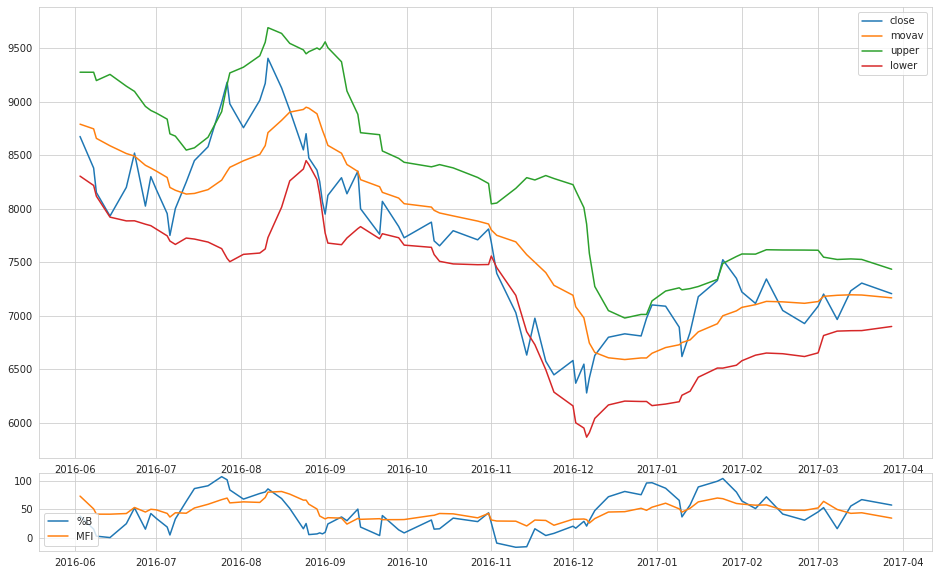

In [384]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

data = data.loc[datetime(2016, 6, 1):datetime(2017, 3, 28)]

ax1.plot(data.index, data['close'])
ax1.plot(data.index, data['movav'])
ax1.plot(data.index, data['upper'])
ax1.plot(data.index, data['lower'])
ax1.legend(('close', 'movav', 'upper', 'lower', ))
ax1.set_xticklabels(' ')

ax2.plot(data.index, data['perc_b'] * 100)
ax2.plot(data.index, data['mfi'])
# ax2.plot(data.index, data['signal'])
# ax2.plot(data.index, data['signal'].diff())
# ax2.plot(data.index, list(itertools.repeat(0, len(data.index))), linestyle = 'dashed')
ax2.legend(('%B', 'MFI', ), loc = 'lower left')

In [385]:
bbands_data = getIndicator(
    cusumTrainPrices, 
    percentB, 
    trailing_volume_n = trailing_volume_window, 
    n = 12, ndev = 2)
bbands_data = bbands_data.unstack().asfreq('C').stack()
bbands_data

perc_b
date       symbol          
2015-02-23 TON.JO -0.244464
2015-02-24 CML.JO -0.464028
2015-02-26 SHP.JO -0.009293
2015-02-27 TON.JO  0.082975
2015-03-02 CCO.JO -1.058853
...                     ...
2017-12-29 TDH.JO -0.674425
           TKG.JO -0.589029
           VKE.JO -0.907431
           VOD.JO -0.585046
           ZED.JO -0.914396

[45055 rows x 1 columns]

In [386]:
bbands_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = bbands_data,
    prices = prices_data,
    quantiles = 5,
    periods = [1, 2, 5]
)
bbands_factor_data

Dropped 0.6% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D    factor  factor_quantile
date       asset                                                          
2015-03-02 CCO.JO  0.000000  0.000000 -0.027248 -1.058853              2.0
           CML.JO -0.013383  0.001368 -0.027547 -0.260016              4.0
           FFB.JO  0.000000  0.077108  0.077108 -0.773837              3.0
           TCP.JO  0.000000  0.000000 -0.021739 -1.097198              1.0
           TON.JO  0.000000  0.000000 -0.036856  0.106009              5.0
...                     ...       ...       ...       ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.000000 -0.879140              2.0
           SOL.JO  0.000000  0.000000  0.018144 -0.373643              4.0
           TWR.JO  0.000000  0.000000  0.022222 -0.185444              5.0
           VOD.JO  0.000000  0.000000  0.034020 -0.247161              5.0
           WHL.JO  0.000000  0.000000  0.024472 -0.982370              1.0

[44804 rows x 5 columns]

In [387]:
mfi_data = getIndicator(
    cusumTrainPrices, 
    mfi, 
    trailing_volume_n = trailing_volume_window, 
    n = 12)
mfi_data = mfi_data.unstack().asfreq('C').stack()
mfi_data

mfi
date       symbol           
2015-02-23 TON.JO  38.110444
2015-02-24 CML.JO  45.298341
2015-02-26 SHP.JO  32.893518
2015-02-27 TON.JO  38.296471
2015-03-02 CCO.JO  73.884795
...                      ...
2017-12-29 TDH.JO  65.541155
           TKG.JO  59.425554
           VKE.JO  66.451506
           VOD.JO  57.950834
           ZED.JO  88.759829

[45055 rows x 1 columns]

In [388]:
bbands_factor_data = createGroupingFactor(
    bbands_factor_data, 
    group_data = mfi_data, 
    prices_data = prices_data, 
    num_groupes = 2)
bbands_factor_data

Dropped 0.2% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D    factor  factor_quantile  \
date       asset                                                             
2015-03-02 CCO.JO  0.000000  0.000000 -0.027248 -1.058853              2.0   
           CML.JO -0.013383  0.001368 -0.027547 -0.260016              4.0   
           FFB.JO  0.000000  0.077108  0.077108 -0.773837              3.0   
           TCP.JO  0.000000  0.000000 -0.021739 -1.097198              1.0   
           TON.JO  0.000000  0.000000 -0.036856  0.106009              5.0   
...                     ...       ...       ...       ...              ...   
2017-12-22 SNT.JO  0.000000  0.000000  0.000000 -0.879140              2.0   
           SOL.JO  0.000000  0.000000  0.018144 -0.373643              4.0   
           TWR.JO  0.000000  0.000000  0.022222 -0.185444              5.0   
           VOD.JO  0.000000  0.000000  0.034020 -0.247161              5.0   
           WHL.JO  0.000000  0.000000  0.024472 -0.982370              1.0   

                   group  
date       asset          
2015-03-02 CCO.JO    2.0  
           CML.JO    1.0  
           FFB.JO    1.0  
           TCP.JO    2.0  
           TON.JO    1.0  
...                  ...  
2017-12-22 SNT.JO    1.0  
           SOL.JO    1.0  
           TWR.JO    1.0  
           VOD.JO    1.0  
           WHL.JO    2.0  

[44804 rows x 6 columns]

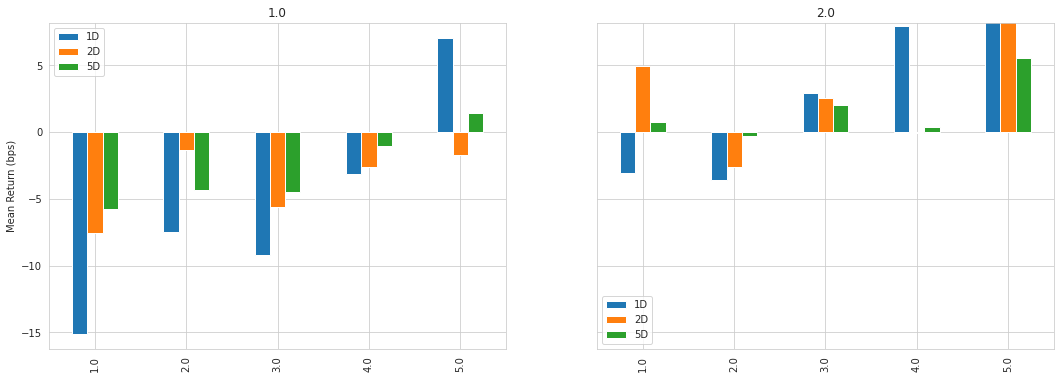

In [389]:
plotFactorQuantileBars(bbands_factor_data, by_group = True, group_adjust = False)

In [390]:
pd.concat([bbands_factor_data['group'], mfi_data], axis = 1).dropna().groupby('group').mean()

,mfi
group,
1.0,34.434466
2.0,67.552194


In [391]:
# fig = plt.figure(figsize = (12, 6))
# g = sns.boxenplot(data = train, x = 'label', y = 'bbands')

In [392]:
# fig = plt.figure(figsize = (12, 6))
# g = sns.boxenplot(data = train, x = 'label', y = 'bbands', hue = 'mfi_group')

### Residual Strength Index

In [393]:
rsi_data = getIndicator(
    cusumTrainPrices, 
    rsi, 
    trailing_volume_n = trailing_volume_window, 
    n = 5)
rsi_data = rsi_data.unstack().asfreq('C').stack()
rsi_data

rsi
date       symbol           
2015-02-23 TON.JO -42.181691
2015-02-24 CML.JO -48.261846
2015-02-26 SHP.JO -28.395179
2015-02-27 TON.JO -32.002229
2015-03-02 CCO.JO -90.796344
...                      ...
2017-12-29 TDH.JO -56.172958
           TKG.JO -55.991741
           VKE.JO -69.087815
           VOD.JO -53.269545
           ZED.JO -73.518050

[45055 rows x 1 columns]

In [394]:
rsi_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = rsi_data,
    prices = prices_data,
    quantiles = 5,
    periods = [1, 2, 5]
)
rsi_factor_data

Dropped 0.6% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                           
2015-03-02 CCO.JO  0.000000  0.000000 -0.027248 -90.796344              1.0
           CML.JO -0.013383  0.001368 -0.027547 -38.427365              4.0
           FFB.JO  0.000000  0.077108  0.077108 -73.088706              3.0
           TCP.JO  0.000000  0.000000 -0.021739 -84.820078              2.0
           TON.JO  0.000000  0.000000 -0.036856 -25.598648              5.0
...                     ...       ...       ...        ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.000000 -60.082408              3.0
           SOL.JO  0.000000  0.000000  0.018144 -49.088000              4.0
           TWR.JO  0.000000  0.000000  0.022222 -36.970545              5.0
           VOD.JO  0.000000  0.000000  0.034020 -40.347338              5.0
           WHL.JO  0.000000  0.000000  0.024472 -75.524993              1.0

[44804 rows x 5 columns]

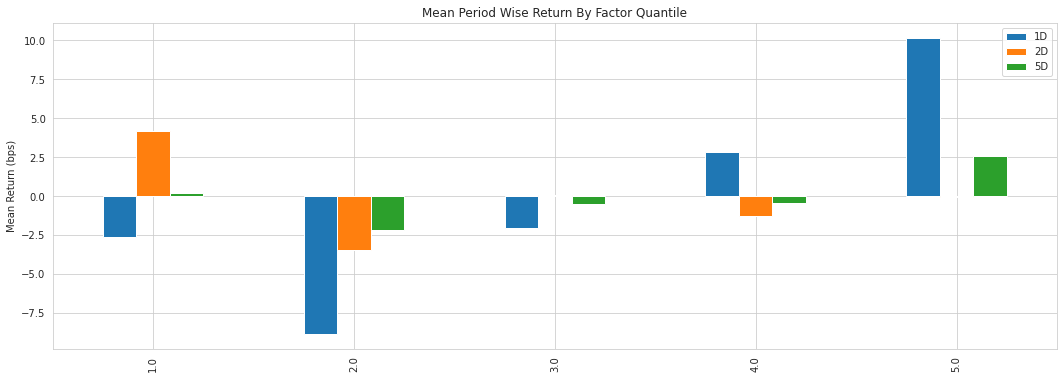

In [395]:
plotFactorQuantileBars(rsi_factor_data)

In [396]:
# fig = plt.figure(figsize = (12, 6))
# g = sns.boxenplot(data = train, x = 'label', y = 'rsi')

In [397]:
tsi_data = getIndicator(
    cusumTrainPrices, 
    tsi, 
    trailing_volume_n = trailing_volume_window, 
    r = 9, s = 5)
tsi_data = tsi_data.unstack().asfreq('C').stack()
tsi_data

tsi
date       symbol           
2015-02-23 TON.JO   3.666063
2015-02-24 CML.JO  -2.895302
2015-02-26 SHP.JO  18.085618
2015-02-27 TON.JO  16.373096
2015-03-02 CCO.JO -62.498424
...                      ...
2017-12-29 TDH.JO  -5.158381
           TKG.JO  16.807044
           VKE.JO -26.493049
           VOD.JO   5.583958
           ZED.JO -31.393763

[45055 rows x 1 columns]

In [398]:
tsi_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = tsi_data,
    prices = prices_data,
    quantiles = 5,
    periods = [1, 2, 5]
)
tsi_factor_data

Dropped 0.6% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                           
2015-03-02 CCO.JO  0.000000  0.000000 -0.027248 -62.498424              2.0
           CML.JO -0.013383  0.001368 -0.027547   5.920989              4.0
           FFB.JO  0.000000  0.077108  0.077108 -78.322781              1.0
           TCP.JO  0.000000  0.000000 -0.021739 -48.253832              3.0
           TON.JO  0.000000  0.000000 -0.036856  28.373896              5.0
...                     ...       ...       ...        ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.000000 -10.826601              3.0
           SOL.JO  0.000000  0.000000  0.018144   9.183405              4.0
           TWR.JO  0.000000  0.000000  0.022222  23.836660              4.0
           VOD.JO  0.000000  0.000000  0.034020  12.929797              4.0
           WHL.JO  0.000000  0.000000  0.024472 -31.404694              2.0

[44804 rows x 5 columns]

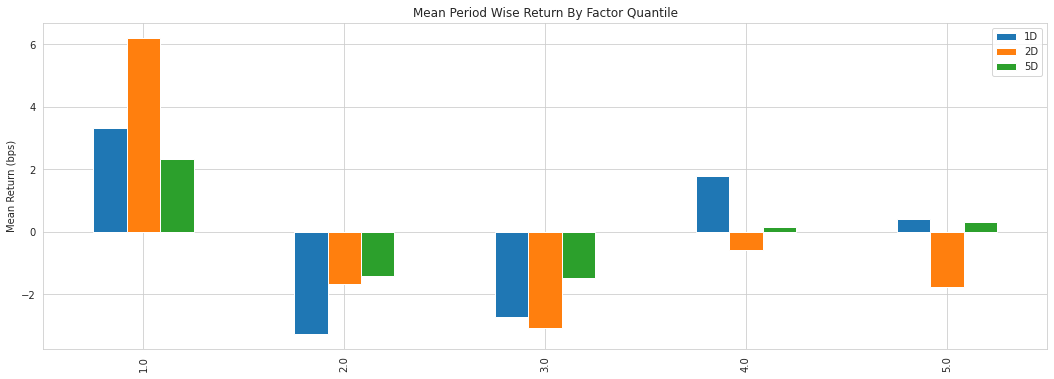

In [399]:
plotFactorQuantileBars(tsi_factor_data)

In [400]:
# fig = plt.figure(figsize = (12, 6))
# g = sns.boxenplot(data = train, x = 'label', y = 'tsi')

### kamaCrossOver

In [401]:
kama_data = getIndicator(
    cusumTrainPrices, 
    kamaCrossOver, pow2 = 14, n = 5, 
    trailing_volume_n = trailing_volume_window)
kama_data = kama_data.unstack().asfreq('C').stack()
kama_data

kama_cross_over
date       symbol                 
2015-02-23 TON.JO         0.023169
2015-02-24 CML.JO        -0.002820
2015-02-26 SHP.JO         0.078001
2015-02-27 TON.JO         0.055046
2015-03-02 CCO.JO        -0.030901
...                            ...
2017-12-29 TDH.JO        -0.091230
           TKG.JO         0.004649
           VKE.JO        -0.042795
           VOD.JO         0.004876
           ZED.JO        -0.051830

[45055 rows x 1 columns]

In [402]:
kama_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = kama_data,
    prices = prices_data,
    quantiles = 5,
    periods = [1, 2, 5]
)
kama_factor_data

Dropped 0.6% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D    factor  factor_quantile
date       asset                                                          
2015-03-02 CCO.JO  0.000000  0.000000 -0.027248 -0.030901              2.0
           CML.JO -0.013383  0.001368 -0.027547  0.019055              4.0
           FFB.JO  0.000000  0.077108  0.077108  0.003058              3.0
           TCP.JO  0.000000  0.000000 -0.021739 -0.051682              1.0
           TON.JO  0.000000  0.000000 -0.036856  0.073698              5.0
...                     ...       ...       ...       ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.000000 -0.030139              3.0
           SOL.JO  0.000000  0.000000  0.018144  0.008563              4.0
           TWR.JO  0.000000  0.000000  0.022222  0.025789              5.0
           VOD.JO  0.000000  0.000000  0.034020  0.039347              5.0
           WHL.JO  0.000000  0.000000  0.024472 -0.061008              1.0

[44804 rows x 5 columns]

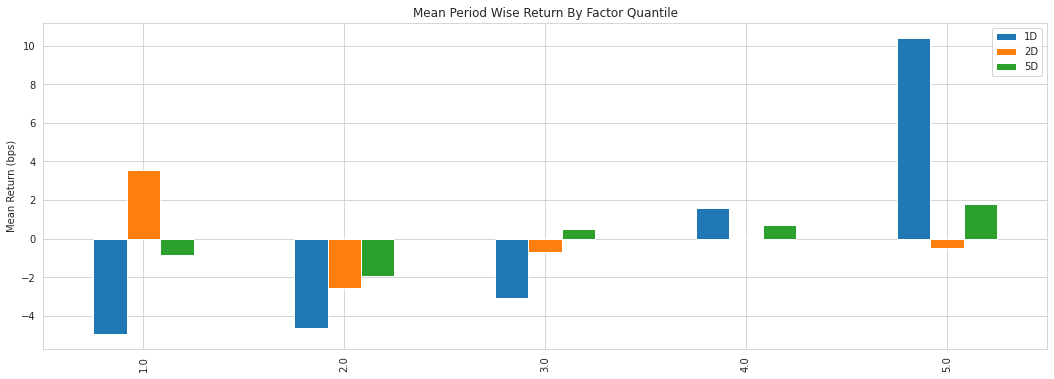

In [403]:
plotFactorQuantileBars(kama_factor_data)

### Awesome Oscillator

In [404]:
ao_data = getIndicator(
    cusumTrainPrices, 
    ao, 
    trailing_volume_n = trailing_volume_window)
ao_data = ao_data.unstack().asfreq('C').stack()
ao_data

ao
date       symbol            
2015-02-23 TON.JO   79.055556
2015-02-24 CML.JO  209.000000
2015-02-26 SHP.JO -266.666667
2015-02-27 TON.JO -123.277778
2015-03-02 CCO.JO  222.111111
...                       ...
2017-12-29 TDH.JO   97.278320
           TKG.JO  -59.111111
           VKE.JO   41.222222
           VOD.JO   83.666667
           ZED.JO   35.555556

[45055 rows x 1 columns]

In [405]:
ao_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = ao_data,
    prices = prices_data,
    quantiles = 5,
    periods = [1, 2, 5]
)
ao_factor_data

Dropped 0.6% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D      factor  factor_quantile
date       asset                                                            
2015-03-02 CCO.JO  0.000000  0.000000 -0.027248  222.111111              4.0
           CML.JO -0.013383  0.001368 -0.027547  108.833333              3.0
           FFB.JO  0.000000  0.077108  0.077108  363.388889              5.0
           TCP.JO  0.000000  0.000000 -0.021739   25.555556              2.0
           TON.JO  0.000000  0.000000 -0.036856 -434.888889              1.0
...                     ...       ...       ...         ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.000000  256.166667              4.0
           SOL.JO  0.000000  0.000000  0.018144 -539.666667              1.0
           TWR.JO  0.000000  0.000000  0.022222   -5.444444              2.0
           VOD.JO  0.000000  0.000000  0.034020    3.111111              3.0
           WHL.JO  0.000000  0.000000  0.024472  111.888889              4.0

[44804 rows x 5 columns]

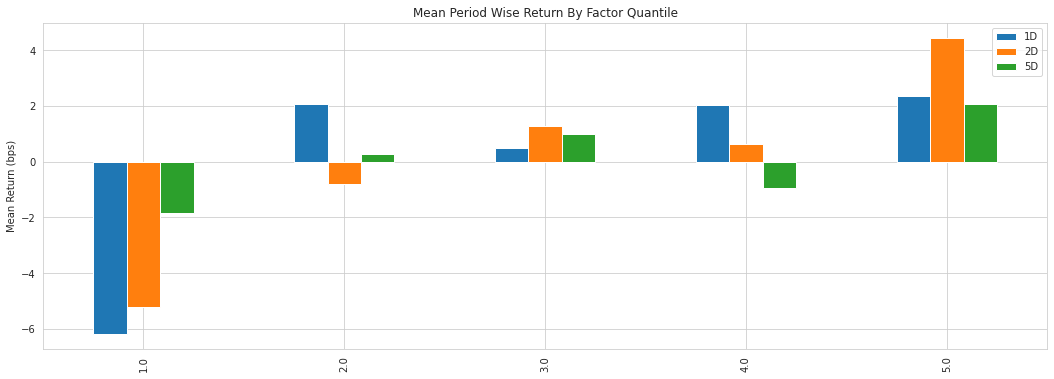

In [406]:
plotFactorQuantileBars(ao_factor_data)

### Rate of Change indicator

In [407]:
roc_data = getIndicator(
    cusumTrainPrices, 
    rocIndicator, 
    trailing_volume_n = trailing_volume_window)
roc_data = roc_data.unstack().asfreq('C').stack()
roc_data

roc
date       symbol           
2015-02-23 TON.JO   2.122714
2015-02-24 CML.JO  -3.920596
2015-02-26 SHP.JO   3.988270
2015-02-27 TON.JO   6.509091
2015-03-02 CCO.JO  -6.565584
...                      ...
2017-12-29 TDH.JO -24.052261
           TKG.JO  -1.349073
           VKE.JO  -4.200000
           VOD.JO  -5.225499
           ZED.JO -11.290323

[45055 rows x 1 columns]

In [408]:
roc_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = roc_data,
    prices = prices_data,
    quantiles = 5,
    periods = [1, 2, 5]
)
roc_factor_data

Dropped 0.6% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                           
2015-03-02 CCO.JO  0.000000  0.000000 -0.027248  -6.565584              3.0
           CML.JO -0.013383  0.001368 -0.027547   0.553721              4.0
           FFB.JO  0.000000  0.077108  0.077108  -9.622642              2.0
           TCP.JO  0.000000  0.000000 -0.021739 -10.179641              1.0
           TON.JO  0.000000  0.000000 -0.036856   6.562500              5.0
...                     ...       ...       ...        ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.000000  -5.494505              2.0
           SOL.JO  0.000000  0.000000  0.018144   1.326266              5.0
           TWR.JO  0.000000  0.000000  0.022222  -0.000000              4.0
           VOD.JO  0.000000  0.000000  0.034020   0.219687              4.0
           WHL.JO  0.000000  0.000000  0.024472  -7.997254              1.0

[44804 rows x 5 columns]

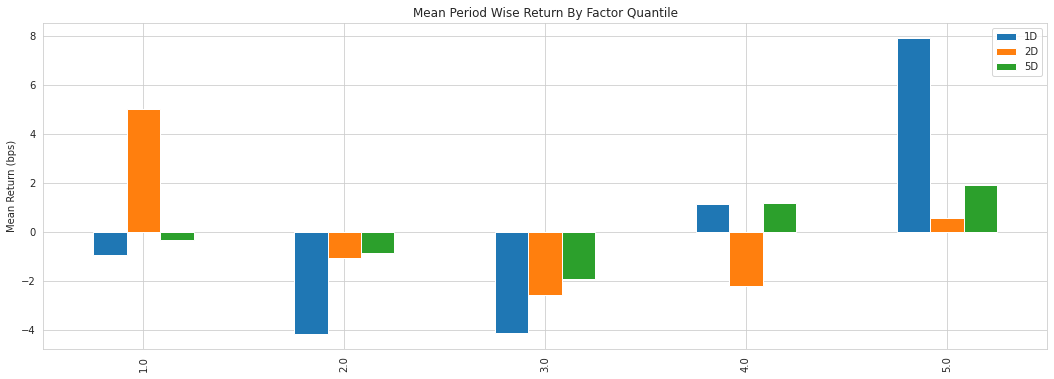

In [409]:
plotFactorQuantileBars(roc_factor_data)

### Stochastic Oscillator

In [410]:
so_data = getIndicator(
    cusumTrainPrices, 
    stochOscillator, 
    trailing_volume_n = trailing_volume_window)
so_data = so_data.unstack().asfreq('C').stack()
so_data

fast_stoch_osc
date       symbol                
2015-02-23 TON.JO       17.957223
2015-02-24 CML.JO       15.247984
2015-02-26 SHP.JO       11.666179
2015-02-27 TON.JO       34.111912
2015-03-02 CCO.JO       -1.473846
...                           ...
2017-12-29 TDH.JO      -14.318423
           TKG.JO      -22.663461
           VKE.JO        1.192207
           VOD.JO       -9.415861
           ZED.JO       -8.027010

[45055 rows x 1 columns]

In [411]:
so_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = so_data,
    prices = prices_data,
    quantiles = 5,
    periods = [1, 2, 5]
)
so_factor_data

Dropped 0.6% entries from factor data: 0.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                           
2015-03-02 CCO.JO  0.000000  0.000000 -0.027248  -1.473846              2.0
           CML.JO -0.013383  0.001368 -0.027547  26.055243              5.0
           FFB.JO  0.000000  0.077108  0.077108   9.680658              4.0
           TCP.JO  0.000000  0.000000 -0.021739  -8.888889              1.0
           TON.JO  0.000000  0.000000 -0.036856   3.059135              3.0
...                     ...       ...       ...        ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.000000  -3.259263              4.0
           SOL.JO  0.000000  0.000000  0.018144  -9.067312              2.0
           TWR.JO  0.000000  0.000000  0.022222   8.623820              5.0
           VOD.JO  0.000000  0.000000  0.034020  15.718212              5.0
           WHL.JO  0.000000  0.000000  0.024472  -9.940129              2.0

[44804 rows x 5 columns]

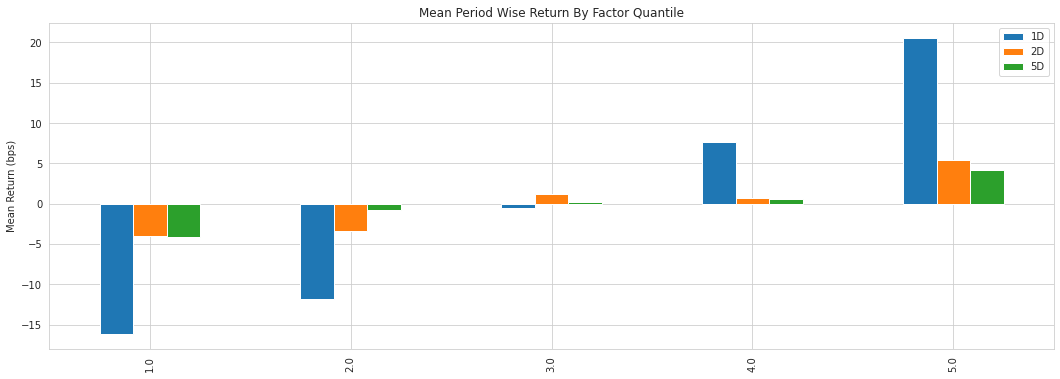

In [412]:
plotFactorQuantileBars(so_factor_data)

### Williams'R Indicator

In [413]:
wr_data = getIndicator(
    cusumTrainPrices, 
    williamsR, lbp = 14, 
    trailing_volume_n = trailing_volume_window)
wr_data = wr_data.unstack().asfreq('C').stack()
wr_data

wr
date       symbol           
2015-02-23 TON.JO  67.974380
2015-02-24 CML.JO  55.183585
2015-02-26 SHP.JO  95.708447
2015-02-27 TON.JO  90.479317
2015-03-02 CCO.JO   3.235908
...                      ...
2017-12-29 TDH.JO  44.966135
           TKG.JO  46.355685
           VKE.JO   4.419890
           VOD.JO  47.823262
           ZED.JO   0.990099

[45055 rows x 1 columns]

In [414]:
wr_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = wr_data,
    prices = prices_data,
    quantiles = 5,
    periods = [1, 2, 5]
)
wr_factor_data

Dropped 0.6% entries from factor data: 0.5% in forward returns computation and 0.1% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                           
2015-03-02 CCO.JO  0.000000  0.000000 -0.027248   3.235908              2.0
           CML.JO -0.013383  0.001368 -0.027547  77.905759              4.0
           FFB.JO  0.000000  0.077108  0.077108  15.725806              3.0
           TCP.JO  0.000000  0.000000 -0.021739   0.000000              1.0
           TON.JO  0.000000  0.000000 -0.036856  83.815552              5.0
...                     ...       ...       ...        ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.000000  23.501199              2.0
           SOL.JO  0.000000  0.000000  0.018144  55.800464              4.0
           TWR.JO  0.000000  0.000000  0.022222  90.740741              5.0
           VOD.JO  0.000000  0.000000  0.034020  79.015544              5.0
           WHL.JO  0.000000  0.000000  0.024472   3.000000              1.0

[44781 rows x 5 columns]

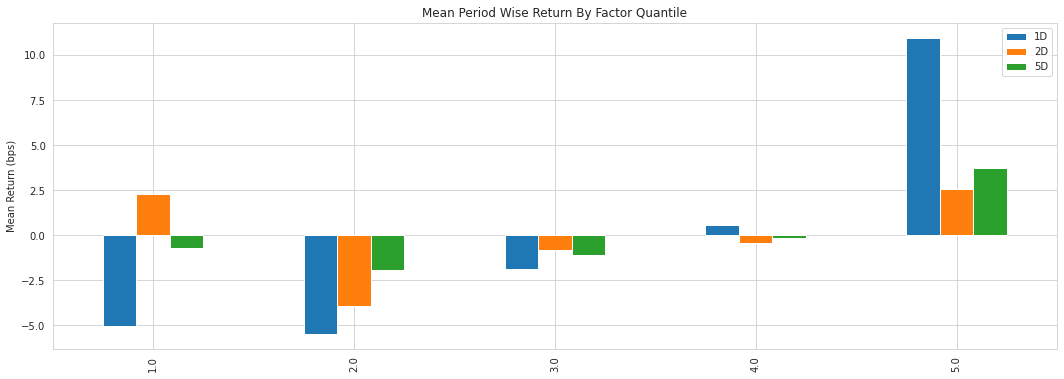

In [415]:
plotFactorQuantileBars(wr_factor_data)

### Ultimate Oscillator

In [416]:
uo_data = getIndicator(
    cusumTrainPrices, 
    uo, 
    trailing_volume_n = trailing_volume_window)
uo_data = uo_data.unstack().asfreq('C').stack()
uo_data

uo
date       symbol              
2015-03-17 CML.JO    -44.988427
2015-03-20 CML.JO    -43.246788
2015-03-25 CML.JO    -43.760184
2015-03-26 STXRES.JO -36.328014
2015-03-27 STXRES.JO -36.290554
...                         ...
2017-12-29 TDH.JO    -57.379919
           TKG.JO    -54.592123
           VKE.JO    -67.221964
           VOD.JO    -53.967838
           ZED.JO    -67.684744

[43383 rows x 1 columns]

In [417]:
uo_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = uo_data,
    prices = prices_data,
    quantiles = 5,
    periods = [1, 2, 5]
)
uo_factor_data

Dropped 0.6% entries from factor data: 0.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                           
2015-03-30 ADH.JO -0.045842 -0.045842 -0.045842 -34.180177              4.0
           CML.JO  0.000000  0.045510  0.045510 -47.498148              1.0
           MUR.JO  0.000000  0.000000 -0.024320 -42.076140              2.0
           RBP.JO  0.000000  0.000000  0.000000 -32.956670              5.0
           TON.JO  0.000000  0.000000  0.030943 -35.487075              3.0
...                     ...       ...       ...        ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.000000 -43.832516              4.0
           SOL.JO  0.000000  0.000000  0.018144 -48.241030              4.0
           TWR.JO  0.000000  0.000000  0.022222 -41.860154              5.0
           VOD.JO  0.000000  0.000000  0.034020 -45.635325              4.0
           WHL.JO  0.000000  0.000000  0.024472 -60.352910              2.0

[43134 rows x 5 columns]

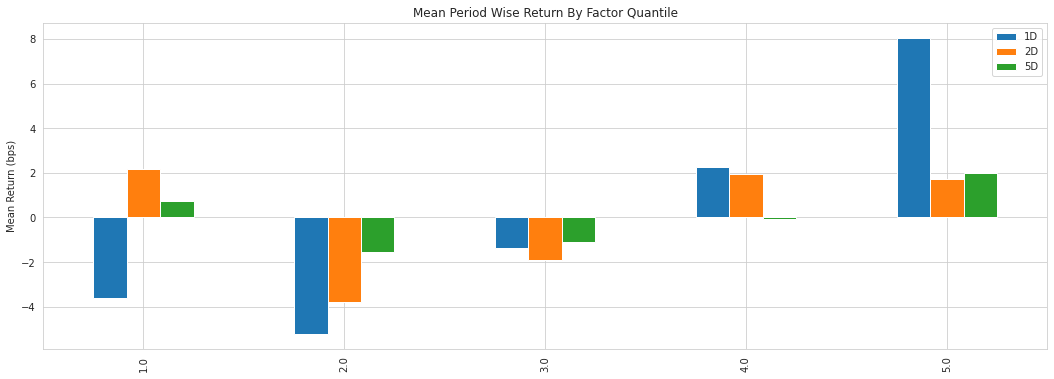

In [418]:
plotFactorQuantileBars(uo_factor_data)

## Alpha Combination

In [419]:
macd_features = macd_factor_data.loc[:, ['factor', 'group']]\
    .rename(columns = {
    'factor':macd_data['MACD_diff_4_6'].name,
    'group':'volume_group'
})

bbands_features = bbands_factor_data.loc[:, ['factor', 'group']]\
    .rename(columns = {
    'factor':bbands_data['perc_b'].name,
    'group':'mfi_group'
})

In [420]:
train = pd.concat([
    macd_features,
    bbands_features,
    rsi_data,
    tsi_data,
    kama_data,
    ao_data,
    roc_data,
    so_data,
    wr_data,
    uo_data,
    target['label']
    ], axis = 1
).dropna()
train

MACD_diff_4_6  volume_group    perc_b  mfi_group  \
2015-03-17 CML.JO         -5.209908           3.0 -0.228267        1.0   
2015-03-20 CML.JO          7.367741           2.0 -0.143720        1.0   
2015-03-25 CML.JO         10.796030           3.0 -0.076165        1.0   
2015-03-26 STXRES.JO      -7.636245           1.0 -0.462310        2.0   
2015-03-27 STXRES.JO       3.635784           1.0 -0.270619        2.0   
...                             ...           ...       ...        ...   
2017-12-22 SNT.JO        -29.043693           1.0 -0.879140        1.0   
           SOL.JO         12.617320           3.0 -0.373643        1.0   
           TWR.JO         -0.174725           1.0 -0.185444        1.0   
           VOD.JO         -3.092646           3.0 -0.247161        1.0   
           WHL.JO        -20.393460           3.0 -0.982370        2.0   

                            rsi        tsi  kama_cross_over          ao  \
2015-03-17 CML.JO    -37.903818  21.546114         0.025375 -113.888889   
2015-03-20 CML.JO    -30.979812  27.054143         0.040987 -113.666667   
2015-03-25 CML.JO    -27.234774  32.834089         0.050083 -179.222222   
2015-03-26 STXRES.JO -50.286975   3.423978        -0.010275   69.166667   
2015-03-27 STXRES.JO -38.016234  10.440401         0.017797   71.388889   
...                         ...        ...              ...         ...   
2017-12-22 SNT.JO    -60.082408 -10.826601        -0.030139  256.166667   
           SOL.JO    -49.088000   9.183405         0.008563 -539.666667   
           TWR.JO    -36.970545  23.836660         0.025789   -5.444444   
           VOD.JO    -40.347338  12.929797         0.039347    3.111111   
           WHL.JO    -75.524993 -31.404694        -0.061008  111.888889   

                           roc  fast_stoch_osc         wr         uo  label  
2015-03-17 CML.JO     1.155198        8.214096  77.503975 -44.988427    0.0  
2015-03-20 CML.JO     0.576428       13.605386  87.975647 -43.246788    0.0  
2015-03-25 CML.JO     3.535354        9.020745  96.270928 -43.760184    0.0  
2015-03-26 STXRES.JO -4.825209        2.261905  64.642857 -36.328014   -1.0  
2015-03-27 STXRES.JO  0.433213       18.174603  86.250000 -36.290554    0.0  
...                        ...             ...        ...        ...    ...  
2017-12-22 SNT.JO    -5.494505       -3.259263  23.501199 -43.832516    0.0  
           SOL.JO     1.326266       -9.067312  55.800464 -48.241030    0.0  
           TWR.JO    -0.000000        8.623820  90.740741 -41.860154    0.0  
           VOD.JO     0.219687       15.718212  79.015544 -45.635325    0.0  
           WHL.JO    -7.997254       -9.940129   3.000000 -60.352910    0.0  

[43140 rows x 13 columns]

In [421]:
corr_data = train.iloc[:, :-1].corr()
corr_data

,MACD_diff_4_6,volume_group,perc_b,mfi_group,rsi,tsi,kama_cross_over,ao,roc,fast_stoch_osc,wr,uo
MACD_diff_4_6,1.000000,-0.002204,0.277527,-0.008794,0.280034,0.089225,0.277003,-0.249793,0.332764,0.306925,0.196492,0.120271
volume_group,-0.002204,1.000000,-0.002438,-0.019686,0.005244,0.011864,0.004043,0.006772,-0.003607,-0.004681,0.007029,0.049325
perc_b,0.277527,-0.002438,1.000000,-0.395400,0.944749,0.824574,0.752808,-0.359020,0.715586,0.431088,0.893533,0.661870
mfi_group,-0.008794,-0.019686,-0.395400,1.000000,-0.415708,-0.500005,-0.301545,0.199095,-0.254272,-0.008197,-0.435303,-0.338656
rsi,0.280034,0.005244,0.944749,-0.415708,1.000000,0.884717,0.758779,-0.374762,0.755029,0.394291,0.879295,0.695915
tsi,0.089225,0.011864,0.824574,-0.500005,0.884717,1.000000,0.640559,-0.423493,0.618566,0.052138,0.835722,0.723804
kama_cross_over,0.277003,0.004043,0.752808,-0.301545,0.758779,0.640559,1.000000,-0.288287,0.788560,0.362048,0.703378,0.521067
ao,-0.249793,0.006772,-0.359020,0.199095,-0.374762,-0.423493,-0.288287,1.000000,-0.324712,0.015988,-0.353501,-0.342479
roc,0.332764,-0.003607,0.715586,-0.254272,0.755029,0.618566,0.788560,-0.324712,1.000000,0.291677,0.620693,0.489949
fast_stoch_osc,0.306925,-0.004681,0.431088,-0.008197,0.394291,0.052138,0.362048,0.015988,0.291677,1.000000,0.438156,0.224197


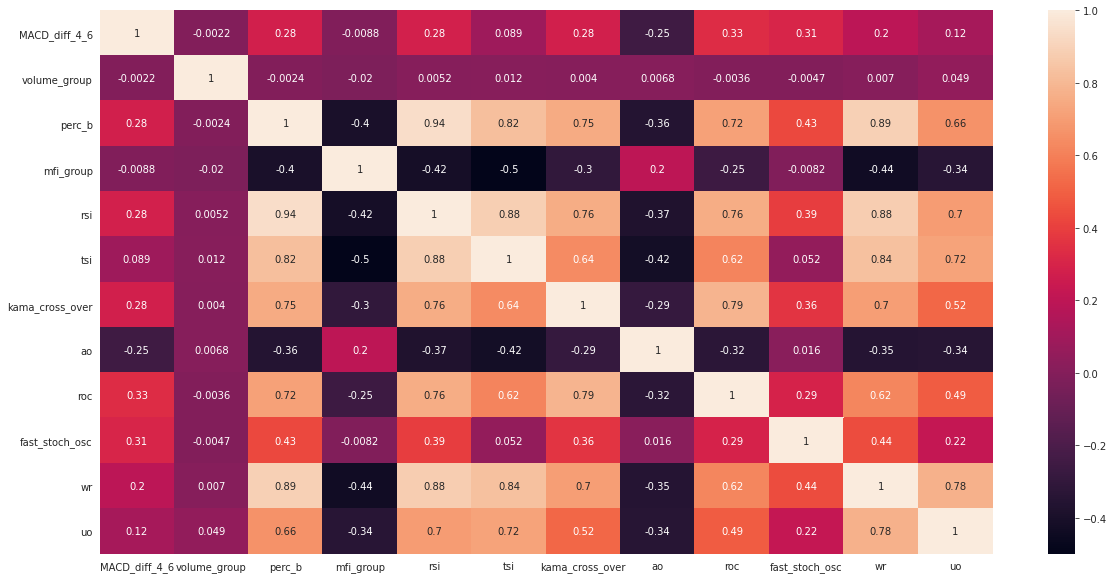

In [422]:
fig = plt.figure(figsize = (20, 10))
g = sns.heatmap(corr_data, annot = True)

In [423]:
train['label'].value_counts() / len(train)

 0.0    0.717524
 1.0    0.142327
-1.0    0.140148
Name: label, dtype: float64

In [424]:
X = train.iloc[:, :-1]
y = train['label']

In [425]:
from sklearn.model_selection import TimeSeriesSplit

In [426]:
cv = 20
ts = TimeSeriesSplit(n_splits = cv)
for i, (train_index, test_index) in enumerate(ts.split(X.unstack())):

    print(f"Fold {i + 1} -------------------------------------------------------")
    print(f"Train: Length = {len(X.unstack().iloc[train_index, ].index)}")
    print(f"Start date: {X.unstack().iloc[train_index, ].index[0].date()}")
    print(f"End date: {X.unstack().iloc[train_index, ].index[-1].date()} \n")
    
    print(f"Test: Length =  {len(X.unstack().iloc[test_index, ].index)}")
    print(f"Start date: {X.unstack().iloc[test_index, ].index[0].date()}")
    print(f"End date: {X.unstack().iloc[test_index, ].index[-1].date()}")
    print(f"----------------------------------------------------------------")
    


Fold 1 -------------------------------------------------------
Train: Length = 35
Start date: 2015-03-17
End date: 2015-05-11 

Test: Length =  34
Start date: 2015-05-12
End date: 2015-06-26
----------------------------------------------------------------
Fold 2 -------------------------------------------------------
Train: Length = 69
Start date: 2015-03-17
End date: 2015-06-26 

Test: Length =  34
Start date: 2015-06-29
End date: 2015-08-13
----------------------------------------------------------------
Fold 3 -------------------------------------------------------
Train: Length = 103
Start date: 2015-03-17
End date: 2015-08-13 

Test: Length =  34
Start date: 2015-08-14
End date: 2015-09-30
----------------------------------------------------------------
Fold 4 -------------------------------------------------------
Train: Length = 137
Start date: 2015-03-17
End date: 2015-09-30 

Test: Length =  34
Start date: 2015-10-01
End date: 2015-11-17
---------------------------------------

In [430]:
def modelFit(clf, X, y, cv):

    predictions = pd.DataFrame()
    probabilities = pd.DataFrame()
    ts = TimeSeriesSplit(n_splits = cv)
    for train_index, test_index in ts.split(X.unstack()):

        train_X = X.unstack().iloc[train_index, ].stack()
        train_y = y.unstack().iloc[train_index].stack()

        test_X = X.unstack().iloc[test_index, ].stack()
        test_y = y.unstack().iloc[test_index].stack()

        target_counts = train_y.value_counts()
        positive_counts = target_counts[1]
        neutral_counts = target_counts[0]
        negative_counts = target_counts[-1]

        out = pd.DataFrame()
        for label_counts in ['positive_counts', 'negative_counts']:

            if label_counts == 'positive_counts':
                minority_mask = train_y == 1
                majority_mask = train_y == 0

            if label_counts == 'negative_counts':
                minority_mask = train_y == -1
                majority_mask = train_y == 0


            minority_df = train_X[minority_mask].copy()
            minority_df['label'] = train_y[minority_mask]

            majority_df = train_X[majority_mask].copy()
            majority_df['label'] = train_y[majority_mask]

            upsampled_minority_df = resample(
                minority_df, 
                replace = True, 
                n_samples = len(majority_df), 
                random_state = 42)

            out = pd.concat(
                [out, upsampled_minority_df])

        upsampled_df = pd.concat(
            [majority_df, out])

        upsampled_train_X = upsampled_df.drop(
            'label', axis = 1)
        upsampled_y = upsampled_df['label']

        model = clf
        model.fit(
            upsampled_train_X, 
            upsampled_y)

        probs = pd.DataFrame(
            model.predict_proba(test_X), 
            columns = model.classes_, 
            index = test_X.index)

        probabilities = pd.concat(
            [probabilities, probs])
        
        preds = pd.DataFrame(
            model.predict(test_X), 
            columns = ['predictions'], 
            index = test_X.index)
        preds['actual'] = test_y

        predictions = pd.concat(
            [predictions, preds])

    return predictions, probabilities

In [451]:
clf = LogisticRegression()
predictions, probabilities = modelFit(clf, X, y, cv = 20)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubunt

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubunt

In [452]:
predictions

predictions  actual
2015-05-12 ADI.JO          0.0     0.0
           AEG.JO          1.0     0.0
           AFE.JO         -1.0     0.0
           AFT.JO          0.0     0.0
           AFX.JO          1.0     0.0
...                        ...     ...
2017-12-22 SNT.JO          0.0     0.0
           SOL.JO         -1.0     0.0
           TWR.JO          1.0     0.0
           VOD.JO          1.0     0.0
           WHL.JO          0.0     0.0

[42178 rows x 2 columns]

In [453]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.15      0.31      0.20      5919
         0.0       0.73      0.35      0.47     30239
         1.0       0.16      0.42      0.23      6020

    accuracy                           0.35     42178
   macro avg       0.35      0.36      0.30     42178
weighted avg       0.57      0.35      0.40     42178



In [454]:
factor_quantile = predictions['predictions'].map({-1:1, 0:2, 1:3})
factor_quantile.name = 'factor_quantile'
factor_quantile

2015-05-12  ADI.JO    2
            AEG.JO    3
            AFE.JO    1
            AFT.JO    2
            AFX.JO    3
                     ..
2017-12-22  SNT.JO    2
            SOL.JO    1
            TWR.JO    3
            VOD.JO    3
            WHL.JO    2
Name: factor_quantile, Length: 42178, dtype: int64

In [455]:
factor_quantile = factor_quantile.loc[datetime(2016, 1, 1):]

In [456]:
probabilities

-1.0       0.0       1.0
2015-05-12 ADI.JO  0.268029  0.417649  0.314322
           AEG.JO  0.298225  0.341262  0.360513
           AFE.JO  0.377001  0.298438  0.324562
           AFT.JO  0.300518  0.359821  0.339662
           AFX.JO  0.323783  0.304751  0.371466
...                     ...       ...       ...
2017-12-22 SNT.JO  0.308155  0.378917  0.312929
           SOL.JO  0.352882  0.330884  0.316234
           TWR.JO  0.294447  0.323157  0.382395
           VOD.JO  0.287053  0.328035  0.384911
           WHL.JO  0.339871  0.380102  0.280027

[42178 rows x 3 columns]

In [457]:
probs = probabilities.loc[:, 1]
probs.name = 'factor'

In [458]:
factor = pd.DataFrame(probs)
factor

factor
2015-05-12 ADI.JO  0.314322
           AEG.JO  0.360513
           AFE.JO  0.324562
           AFT.JO  0.339662
           AFX.JO  0.371466
...                     ...
2017-12-22 SNT.JO  0.312929
           SOL.JO  0.316234
           TWR.JO  0.382395
           VOD.JO  0.384911
           WHL.JO  0.280027

[42178 rows x 1 columns]

In [459]:
factor = factor.unstack().asfreq('C').stack()
factor.index.levels[0].freq

<CustomBusinessDay>

In [460]:
forward_returns = alphalens.utils.compute_forward_returns(
    factor = factor,
    prices = prices_data,
    periods = [1, 2, 5]
)
forward_returns

1D        2D        5D
date       asset                                
2015-05-12 ABG.JO  -0.010929 -0.024536  0.015301
           ABSP.JO  0.000000  0.000000 -0.000051
           ACG.JO  -0.003587 -0.031390  0.031390
           ACL.JO   0.000000  0.000000  0.033589
           ACT.JO   0.000000  0.000000  0.011146
...                      ...       ...       ...
2017-12-22 VOD.JO   0.000000  0.000000  0.034020
           WHL.JO   0.000000  0.000000  0.024472
           WSL.JO   0.000000  0.000000  0.031056
           ZED.JO   0.000000  0.000000  0.022222
           ZPLP.JO  0.000000  0.000000  0.000000

[161424 rows x 3 columns]

In [461]:
clf_factor_data = pd.concat([forward_returns, factor, factor_quantile], axis = 1).dropna()
clf_factor_data.index.set_names(['date', 'asset'], inplace = True)
clf_factor_data

1D        2D        5D    factor  factor_quantile
date       asset                                                          
2016-01-01 ADH.JO  0.000000  0.000000  0.009615  0.297651              2.0
           AEG.JO  0.000000 -0.004425 -0.008849  0.341226              2.0
           COH.JO  0.000000  0.000000 -0.065583  0.280338              2.0
           ITE.JO  0.008477 -0.037285  0.008477  0.288394              1.0
           JSE.JO -0.039062 -0.039062 -0.072031  0.332393              2.0
...                     ...       ...       ...       ...              ...
2017-12-22 SNT.JO  0.000000  0.000000  0.000000  0.312929              2.0
           SOL.JO  0.000000  0.000000  0.018144  0.316234              1.0
           TWR.JO  0.000000  0.000000  0.022222  0.382395              3.0
           VOD.JO  0.000000  0.000000  0.034020  0.384911              3.0
           WHL.JO  0.000000  0.000000  0.024472  0.280027              2.0

[31926 rows x 5 columns]

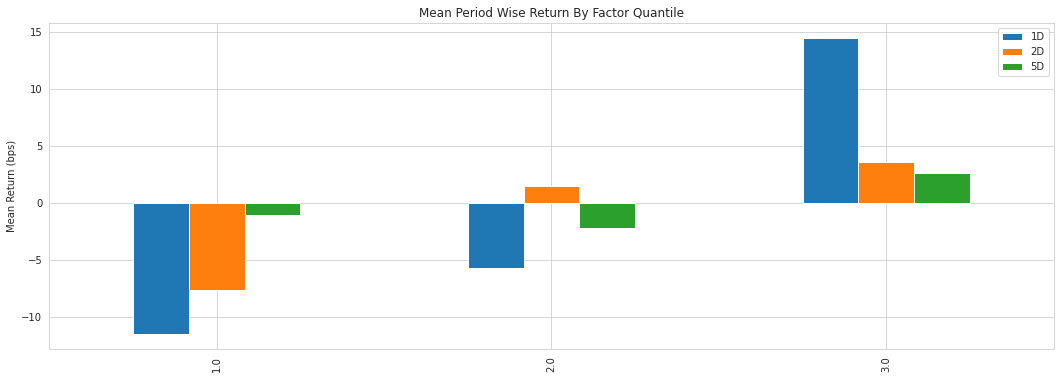

In [462]:
plotFactorQuantileBars(clf_factor_data)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

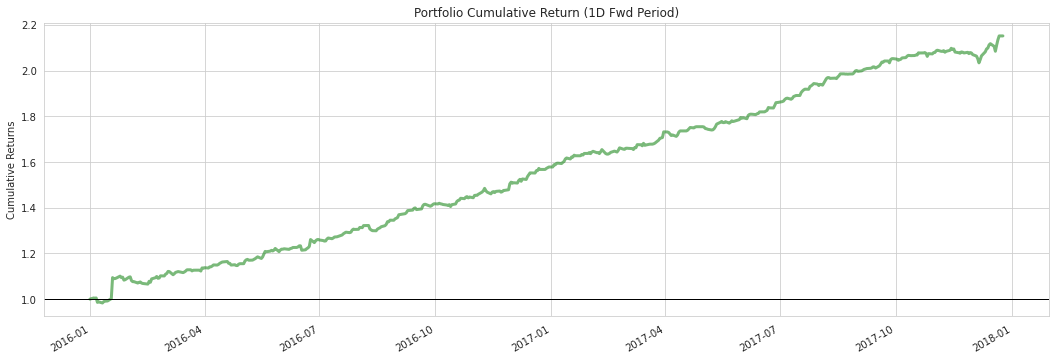

In [463]:
plotCumulativeReturns(clf_factor_data)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

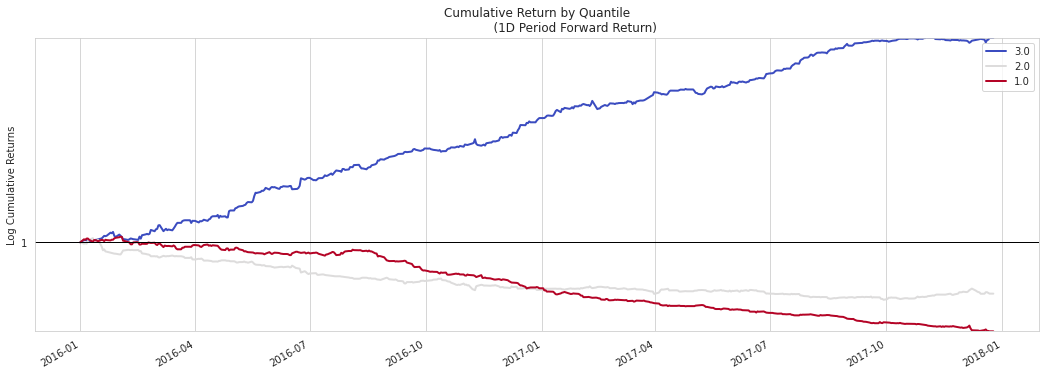

In [464]:
plotQuantileCumelativeReturns(clf_factor_data)

In [465]:
pyfolio_input = alphalens.performance.create_pyfolio_input(clf_factor_data, period = '1D', capital = 100, quantiles = [1, 3])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:545: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


In [466]:
returns = pyfolio_input[0]
positions = pyfolio_input[1]
benchmark = pyfolio_input[2]

Start date,2016-01-01
End date,2017-12-25
Total months,34
,Backtest
Annual return,38.2%
Cumulative returns,153.5%
Annual volatility,8.7%
Sharpe ratio,3.78
Calmar ratio,16.02
Stability,0.99
Max drawdown,-2.4%


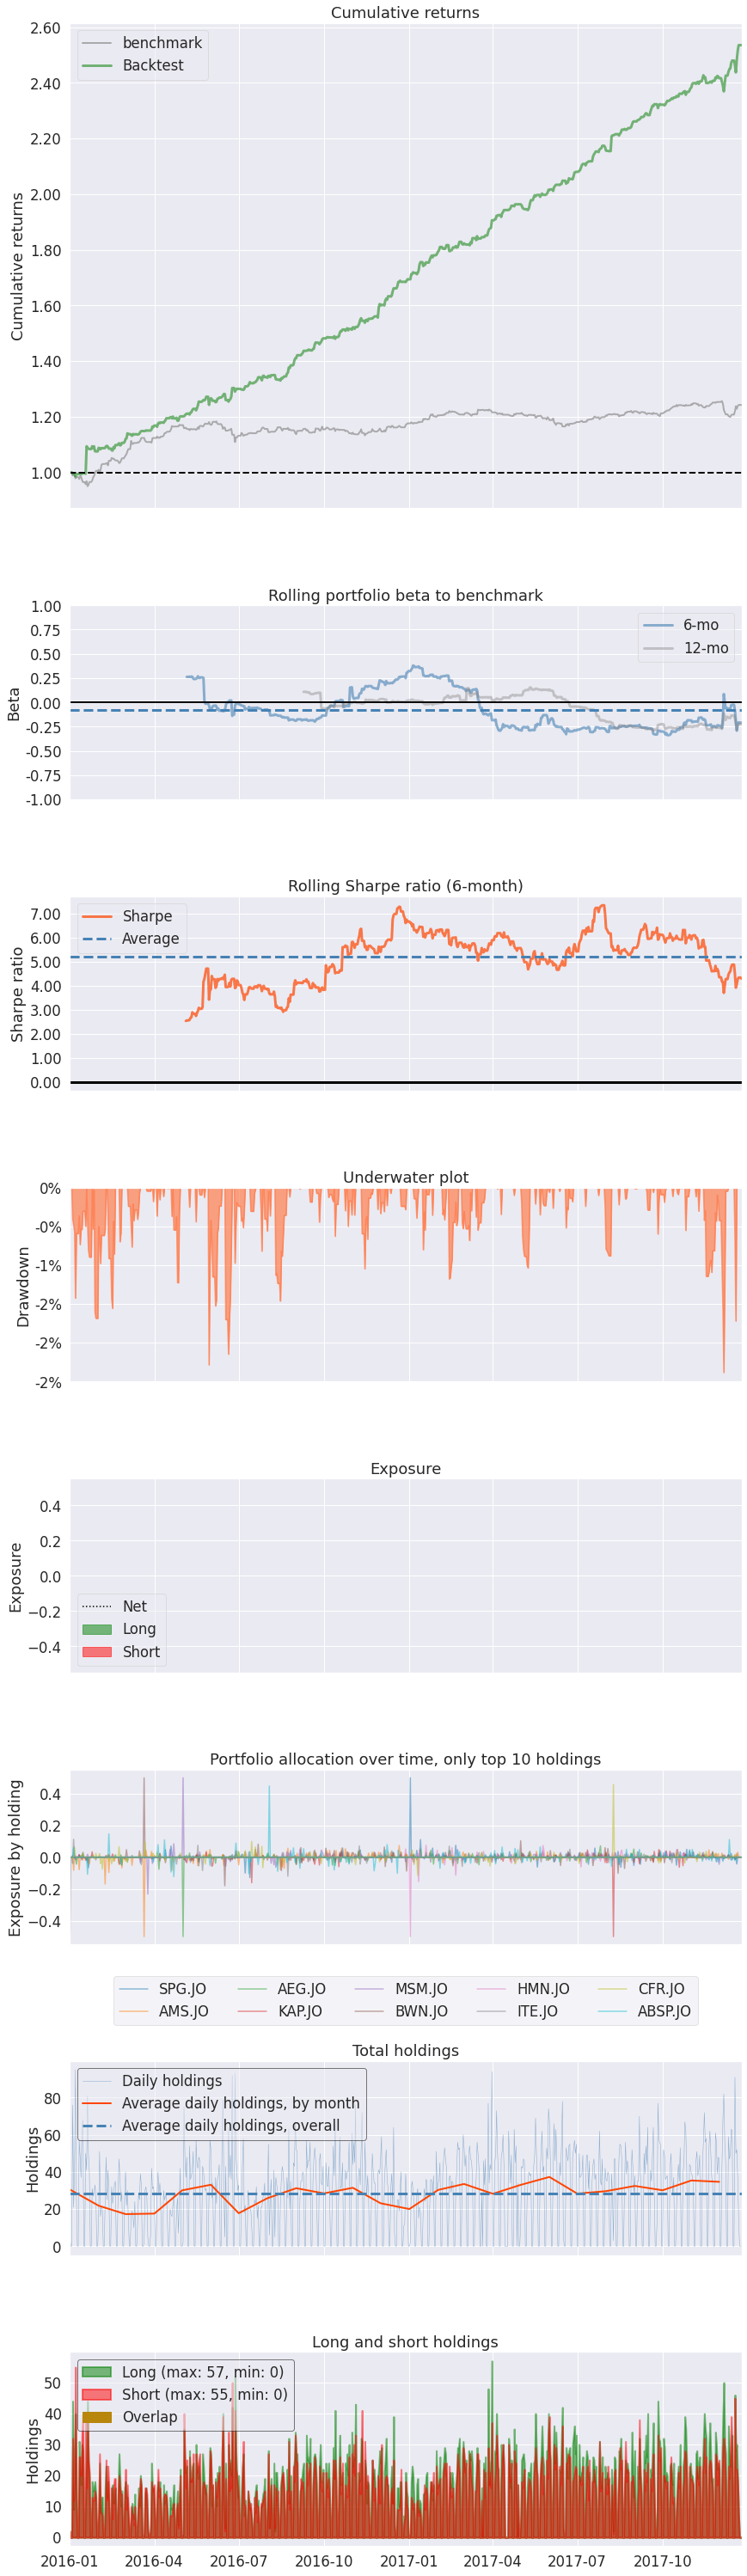

In [467]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark)

Top 10 long positions of all time,max
asset,
SPG.JO,50.00%
MSM.JO,50.00%
BWN.JO,50.00%
CFR.JO,45.73%
ABSP.JO,44.78%
MTN.JO,36.96%
NFTRCI.JO,34.56%
SBK.JO,32.99%
RMH.JO,32.35%


Top 10 short positions of all time,max
asset,
AMS.JO,-50.00%
AEG.JO,-50.00%
KAP.JO,-50.00%
HMN.JO,-50.00%
ITE.JO,-48.03%
FBR.JO,-41.72%
JSE.JO,-38.05%
ANH.JO,-33.79%
SRE.JO,-31.99%


Top 10 positions of all time,max
asset,
SPG.JO,50.00%
AMS.JO,50.00%
AEG.JO,50.00%
KAP.JO,50.00%
MSM.JO,50.00%
BWN.JO,50.00%
HMN.JO,50.00%
ITE.JO,48.03%
CFR.JO,45.73%


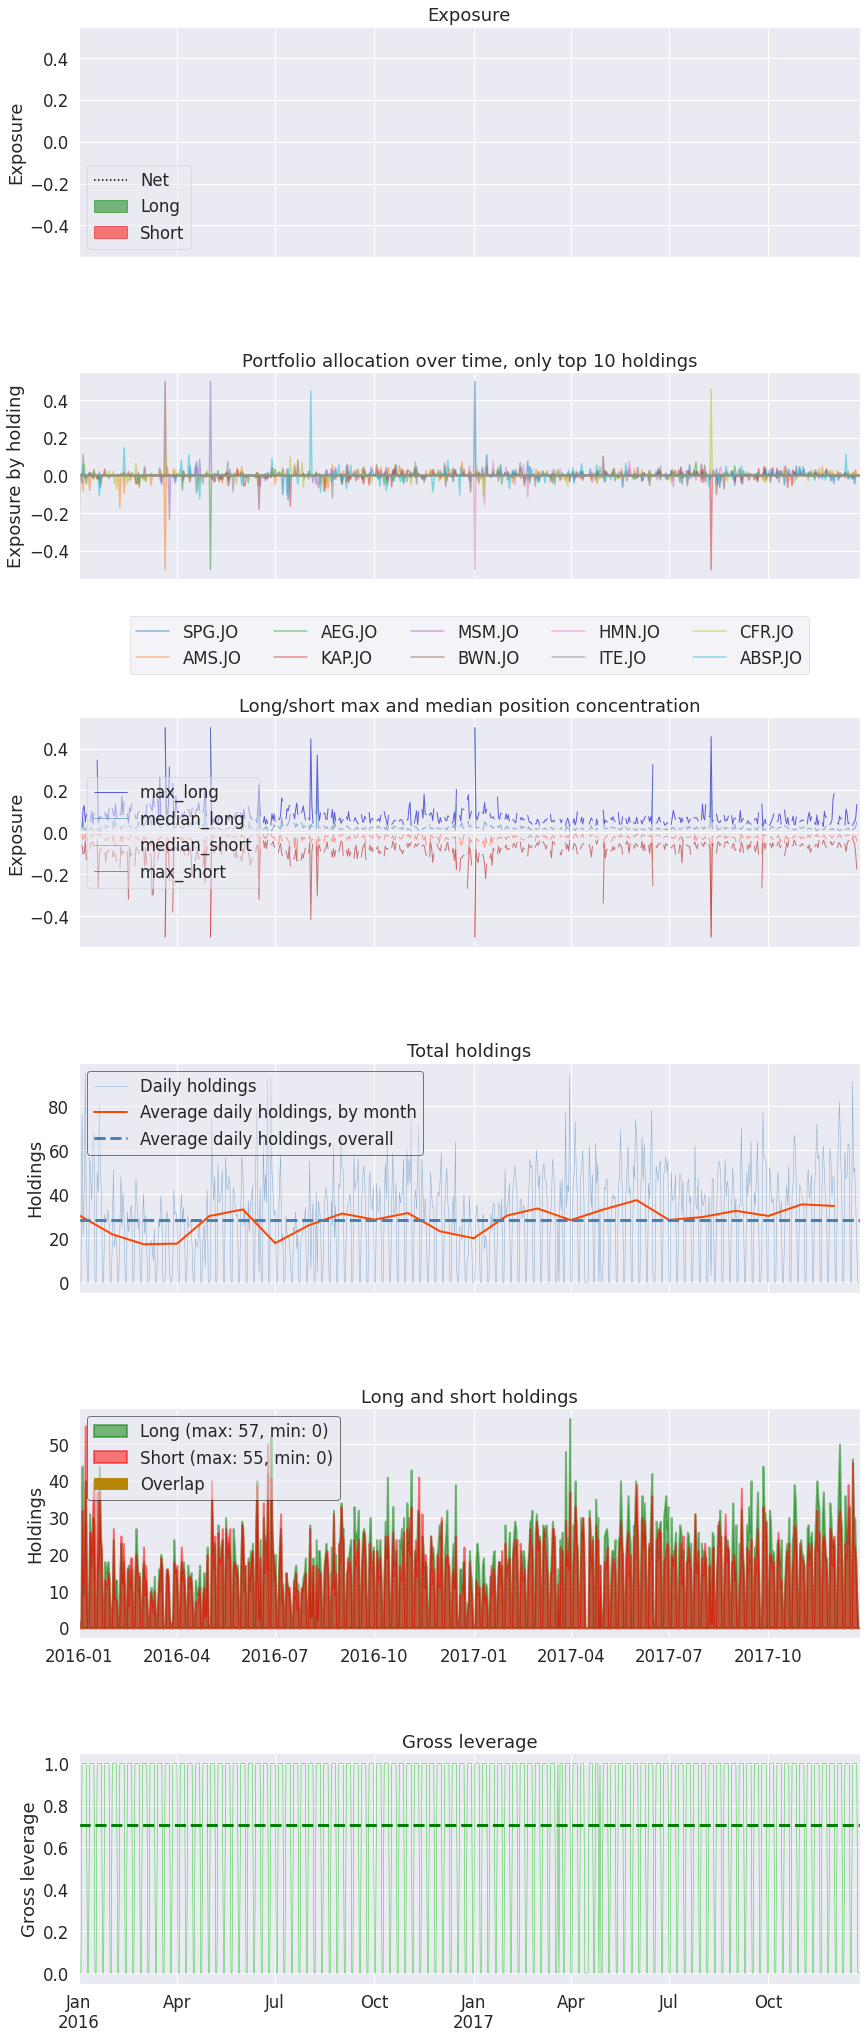

In [468]:
pyfolio.create_position_tear_sheet(returns, positions)

## Predictive Modeling and Perfomance Evaluation

### Machine Learning

### Neural Networks and Deep Learning

### Model Perfomance and Selection

## WalkForward Analysis

In [ ]:
# wf_start_date = macd_data.dropna().reset_index().sort_values('date')['date'][0]
wf_start_date = datetime(2016, 3, 1)
wf_start_date

In [ ]:
training_window = 66
testing_window = 22

In [ ]:
def getPrices(data, start_date, training_window = None, test = False, testing_window = None):
    prices = data.loc[start_date: ].copy()
    if not test:
        prices_df = prices.iloc[:training_window]
    else:
        prices_df = prices.iloc[training_window:training_window + testing_window]
    prices_df.index = pd.to_datetime(prices_df.index)
    return prices_df

In [ ]:
train_prices = getPrices(data = prices_data, start_date=wf_start_date, training_window=training_window)
test_prices = getPrices(data = prices_data, start_date=wf_start_date, training_window=training_window, test = True, testing_window=testing_window)

In [ ]:
def getFactor(indicator, date_range):
    
    factor = indicator.reset_index()
    factor_filtered = factor[factor['date'].isin(date_range)].set_index(['date', 'asset'])
    return factor_filtered

In [ ]:
macd_data_train = getFactor(indicator = macd_data, date_range = train_prices.index)
volume_data_train = getFactor(indicator = volume_data, date_range = train_prices.index)

macd_data_test = getFactor(indicator = macd_data, date_range = test_prices.index)
volume_data_test = getFactor(indicator = volume_data, date_range = test_prices.index)

In [ ]:
def getCleanFactorData(factor, prices, quantiles = 3):
    factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
        factor = factor, 
        prices = prices, 
        quantiles = quantiles, 
        max_loss = 0.75)
    return factor_data

In [ ]:
macd_factor_data_train = getCleanFactorData(factor = macd_data_train, prices = train_prices, quantiles = 3)
volume_factor_data_train = getCleanFactorData(factor = volume_data_train, prices = train_prices, quantiles = 3)

macd_factor_data_test = getCleanFactorData(factor = macd_data_test, prices = test_prices, quantiles = 3)
volume_factor_data_test = getCleanFactorData(factor = volume_data_test, prices = test_prices, quantiles = 3)

In [ ]:
def getData(macd_factor_data, volume_factor_data):
    macd_sig = macd_factor_data['factor']
    macd_sig.name = 'macd_sig'

    volume_bins = volume_factor_data['factor_quantile']
    volume_bins.name = 'volume_bins'

    target = macd_factor_data['1D']
    target.name = 'target'

    data = pd.concat([macd_sig, volume_bins, target], axis = 1)
    return data

In [ ]:
train = getData(macd_factor_data_train, volume_factor_data_train)
test = getData(macd_factor_data_test, volume_factor_data_test)

In [ ]:
train.head()

In [ ]:
train['target2']

In [ ]:
pd.qcut(train['target'], q = 3, labels = ['short', 'nothing', 'long'], duplicates = 'drop').value_counts().sum() #

In [ ]:
X_train = train[['macd_sig', 'volume_bins']]
y_train = train['target']

X_test = test[['macd_sig', 'volume_bins']]
y_test = test['target']

# Backtesting and Trading Simulation

# Summary and Conclusions